# Proyek Analisis Data: Air Quality
- Nama: Eka setyo agung mahanani
- Email: ekaagung090@gmail.com
- Id Dicoding: ekasetyo090

## Pertanyaan Bisnis

- hari apa yang memiliki total konsentrasi debu (PM2.5, PM10) paling banyak di udara dari rata-rata 12 stasiun di beijing pada tahun 2016
- pukul berapa yang memiliki total konsentrasi debu (PM2.5, PM10) paling banyak  di udara dari rata-rata 12 stasiun di beijing  pada tahun 2016



## Menyiapkan Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import streamlit as st
pd.set_option("display.max_columns", None)



In [3]:
# fungsi memerisa null values
def check_null_values(dataframes):
    for df in dataframes:
        station_mode = df["station"].mode().iloc[0]
        message = f'Null value pada dataset {station_mode}'
        print(message)
        print(df.isna().sum())
        print("-----------------")

# fungsi mengolah data frame
def preprocess_dataframe(df):
    # Menghapus baris terakhir
    #df = df.iloc[:-1, :]

    # Menambahkan kolom tanggal
    tanggal_main = pd.to_datetime(df.index)
    df.insert(len(df.columns), 'tanggal', tanggal_main)

    # Menambahkan kolom hari dalam bentuk nomer
    hari_nomer = df['tanggal'].dt.dayofweek

    df.insert(len(df.columns), 'hari angka', hari_nomer)

    # Menambahkan kolom hari dalam bentuk nama
    hari_nama = df['tanggal'].dt.day_name().map({'Monday': 'Senin',
                                                  'Tuesday': 'Selasa',
                                                  'Wednesday': 'Rabu',
                                                  'Thursday': 'Kamis',
                                                  'Friday': 'Jumat',
                                                  'Saturday': 'Sabtu',
                                                  'Sunday': 'Minggu'})
    df.insert(len(df.columns), 'hari', hari_nama)
    pukul = df['tanggal'].dt.hour
    df.insert(len(df.columns), 'pukul', pukul)
    return df

## Data Wrangling

### Data Gathering

In [4]:
# load csv data
df_Aotizhongxin = pd.read_csv('PRSA_Data/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
df_Changping = pd.read_csv('PRSA_Data/PRSA_Data_Changping_20130301-20170228.csv')
df_Dingling = pd.read_csv('PRSA_Data/PRSA_Data_Dingling_20130301-20170228.csv')
df_Dongsi = pd.read_csv('PRSA_Data/PRSA_Data_Dongsi_20130301-20170228.csv')
df_Guanyuan = pd.read_csv('PRSA_Data/PRSA_Data_Guanyuan_20130301-20170228.csv')
df_Gucheng = pd.read_csv('PRSA_Data/PRSA_Data_Gucheng_20130301-20170228.csv')
df_Huairou = pd.read_csv('PRSA_Data/PRSA_Data_Huairou_20130301-20170228.csv')
df_Nongzhanguan = pd.read_csv('PRSA_Data/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
df_Shunyi = pd.read_csv('PRSA_Data/PRSA_Data_Shunyi_20130301-20170228.csv')
df_Tiantan = pd.read_csv('PRSA_Data/PRSA_Data_Tiantan_20130301-20170228.csv')
df_Wanliu = pd.read_csv('PRSA_Data/PRSA_Data_Wanliu_20130301-20170228.csv')
df_Wanshouxigong = pd.read_csv('PRSA_Data/PRSA_Data_Wanshouxigong_20130301-20170228.csv')

# set list for shorten code later.
dataframes = [df_Aotizhongxin, df_Changping, df_Dingling, df_Dongsi,
              df_Guanyuan, df_Gucheng, df_Huairou, df_Nongzhanguan, df_Shunyi,
              df_Tiantan, df_Wanliu, df_Wanshouxigong]

### Assesing

#### Assesing Data For Each Columns

Berdasarkan keterangan yang didapat pada sumber data, masing masing kolom terdapat parameter yang mempresentasikan faktor antara lain:
  

*   No: row number.
*   year: year of data in this row.
*   month: month of data in this row.
*   day: day of data in this row.
*   hour: hour of data in this row.
*   PM2.5: PM2.5 concentration (ug/m^3).
*   PM10: PM10 concentration (ug/m^3).
*   SO2: SO2 concentration (ug/m^3).
*   NO2: NO2 concentration (ug/m^3).
*   CO: CO concentration (ug/m^3).
*   O3: O3 concentration (ug/m^3).
*   TEMP: temperature (degree Celsius).
*   PRES: pressure (hPa).
*   DEWP: dew point temperature (degree Celsius).
*   RAIN: precipitation (mm).
*   wd: wind direction.
*   WSPM: wind speed (m/s).
*   station: name of the air-quality monitoring site.

Berdasarkan Keterangan diatas maka kita akan melakukan validasi kolom yang ada pada setiap dataframe yang ada

In [5]:
# validasi nama kolom tiap dataset
column_names = ["No", "year", "month", "day", "hour", "PM2.5", "PM10", "SO2",
                "NO2", "CO", "O3","TEMP", "PRES", "DEWP", "RAIN", "wd", "WSPM",
                "station"]
for df in dataframes:
    columns = df.columns
    match = True
    # Memeriksa kesesuaian nama kolom berdasarkan urutan indeks
    for i in range(len(columns)):
        if columns[i] != column_names[i]:
            match = False
            break
        if match:
            print(f"Nama kolom '{columns[i]}' dataset {df['station'].mode().iloc[0]} sesuai dengan keterangan sumber data")
        else:
            print(f"Nama kolom '{columns[i]}' dataset {df['station'].mode().iloc[0]} tidak sesuai dengan keterangan sumber data")
        print("")

Nama kolom 'No' dataset Aotizhongxin sesuai dengan keterangan sumber data

Nama kolom 'year' dataset Aotizhongxin sesuai dengan keterangan sumber data

Nama kolom 'month' dataset Aotizhongxin sesuai dengan keterangan sumber data

Nama kolom 'day' dataset Aotizhongxin sesuai dengan keterangan sumber data

Nama kolom 'hour' dataset Aotizhongxin sesuai dengan keterangan sumber data

Nama kolom 'PM2.5' dataset Aotizhongxin sesuai dengan keterangan sumber data

Nama kolom 'PM10' dataset Aotizhongxin sesuai dengan keterangan sumber data

Nama kolom 'SO2' dataset Aotizhongxin sesuai dengan keterangan sumber data

Nama kolom 'NO2' dataset Aotizhongxin sesuai dengan keterangan sumber data

Nama kolom 'CO' dataset Aotizhongxin sesuai dengan keterangan sumber data

Nama kolom 'O3' dataset Aotizhongxin sesuai dengan keterangan sumber data

Nama kolom 'TEMP' dataset Aotizhongxin sesuai dengan keterangan sumber data

Nama kolom 'PRES' dataset Aotizhongxin sesuai dengan keterangan sumber data

Nama k

Nama kolom 'TEMP' dataset Huairou sesuai dengan keterangan sumber data

Nama kolom 'PRES' dataset Huairou sesuai dengan keterangan sumber data

Nama kolom 'DEWP' dataset Huairou sesuai dengan keterangan sumber data

Nama kolom 'RAIN' dataset Huairou sesuai dengan keterangan sumber data

Nama kolom 'wd' dataset Huairou sesuai dengan keterangan sumber data

Nama kolom 'WSPM' dataset Huairou sesuai dengan keterangan sumber data

Nama kolom 'station' dataset Huairou sesuai dengan keterangan sumber data

Nama kolom 'No' dataset Nongzhanguan sesuai dengan keterangan sumber data

Nama kolom 'year' dataset Nongzhanguan sesuai dengan keterangan sumber data

Nama kolom 'month' dataset Nongzhanguan sesuai dengan keterangan sumber data

Nama kolom 'day' dataset Nongzhanguan sesuai dengan keterangan sumber data

Nama kolom 'hour' dataset Nongzhanguan sesuai dengan keterangan sumber data

Nama kolom 'PM2.5' dataset Nongzhanguan sesuai dengan keterangan sumber data

Nama kolom 'PM10' dataset Nongzhan

#### Assesing Data Type For Each Dataset

In [6]:
#@markdown memeriksa tipe data semua kolom di seluruh dataset
for i in dataframes:
    print("*****************************")
    print(f'Tipe Data Dataset {i["station"].mode().iloc[0]}')
    i.info()
    print("*****************************")
    print('')

*****************************
Tipe Data Dataset Aotizhongxin
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
*******

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
*****************************

*****************************
Tipe Da

In [7]:
# validasi tipe data
for column in column_names:
    data_types = []  # List untuk menyimpan tipe data dari setiap dataset
    for df in dataframes:
        data_type = df[column].dtype
        if data_type not in data_types:
            data_types.append(data_type)
        else:
            pass
    if len(set(data_types)) == 1:
        print(f'Kolom "{column}" memiliki tipe data yang sama di semua dataset.')
    else:
        print(f'Kolom "{column}" memiliki tipe data yang berbeda di beberapa dataset.')

Kolom "No" memiliki tipe data yang sama di semua dataset.
Kolom "year" memiliki tipe data yang sama di semua dataset.
Kolom "month" memiliki tipe data yang sama di semua dataset.
Kolom "day" memiliki tipe data yang sama di semua dataset.
Kolom "hour" memiliki tipe data yang sama di semua dataset.
Kolom "PM2.5" memiliki tipe data yang sama di semua dataset.
Kolom "PM10" memiliki tipe data yang sama di semua dataset.
Kolom "SO2" memiliki tipe data yang sama di semua dataset.
Kolom "NO2" memiliki tipe data yang sama di semua dataset.
Kolom "CO" memiliki tipe data yang sama di semua dataset.
Kolom "O3" memiliki tipe data yang sama di semua dataset.
Kolom "TEMP" memiliki tipe data yang sama di semua dataset.
Kolom "PRES" memiliki tipe data yang sama di semua dataset.
Kolom "DEWP" memiliki tipe data yang sama di semua dataset.
Kolom "RAIN" memiliki tipe data yang sama di semua dataset.
Kolom "wd" memiliki tipe data yang sama di semua dataset.
Kolom "WSPM" memiliki tipe data yang sama di semu

#### Assesing NULL Value Setiap Dataset


In [8]:
# memeriksa null values
check_null_values(dataframes)

Null value pada dataset Aotizhongxin
No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64
-----------------
Null value pada dataset Changping
No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64
-----------------
Null value pada dataset Dingling
No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WS

Didapatkan di semua dataset hanya kolom.
(PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM.)
yang memiliki NULL value

In [9]:
# memeriksa persentase null values
null_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']
for df in dataframes:
    message = f"----------Dataset '{df['station'].mode().iloc[0]}'----------"
    print(message)
    for i in null_columns:
        percentage = (df[i].isnull().sum() / len(df[i])) * 100
        print(f"Persentase Null Kolom '{i}' = {percentage:.2f}%")
    print("-" * len(message))
    print('')

----------Dataset 'Aotizhongxin'----------
Persentase Null Kolom 'PM2.5' = 2.64%
Persentase Null Kolom 'PM10' = 2.05%
Persentase Null Kolom 'SO2' = 2.67%
Persentase Null Kolom 'NO2' = 2.92%
Persentase Null Kolom 'CO' = 5.07%
Persentase Null Kolom 'O3' = 4.90%
Persentase Null Kolom 'TEMP' = 0.06%
Persentase Null Kolom 'PRES' = 0.06%
Persentase Null Kolom 'DEWP' = 0.06%
Persentase Null Kolom 'RAIN' = 0.06%
Persentase Null Kolom 'wd' = 0.23%
Persentase Null Kolom 'WSPM' = 0.04%
------------------------------------------

----------Dataset 'Changping'----------
Persentase Null Kolom 'PM2.5' = 2.21%
Persentase Null Kolom 'PM10' = 1.66%
Persentase Null Kolom 'SO2' = 1.79%
Persentase Null Kolom 'NO2' = 1.90%
Persentase Null Kolom 'CO' = 4.34%
Persentase Null Kolom 'O3' = 1.72%
Persentase Null Kolom 'TEMP' = 0.15%
Persentase Null Kolom 'PRES' = 0.14%
Persentase Null Kolom 'DEWP' = 0.15%
Persentase Null Kolom 'RAIN' = 0.15%
Persentase Null Kolom 'wd' = 0.40%
Persentase Null Kolom 'WSPM' = 0.12%

dari hasil diatas diketahui untuk setiap kolom di semua dataset kita menemukan bahwa persentase null value paling besar kurang dari 10%.

#### Assesing Outlier Kolom(Numerik) Setiap Dataset

*************Box Plot Kolom PM2.5*************


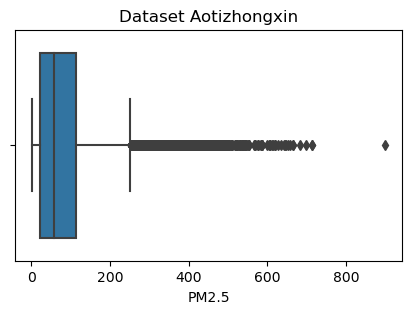

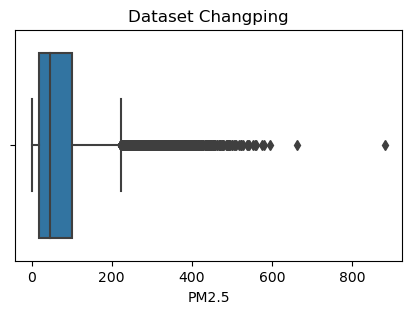

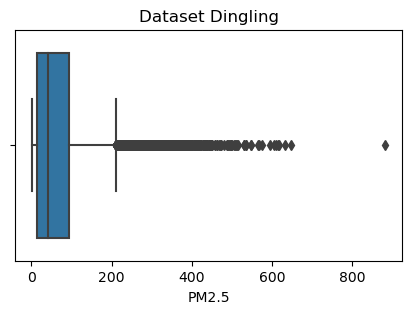

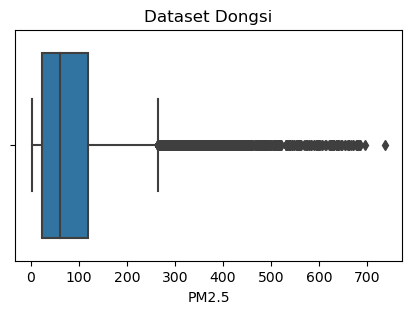

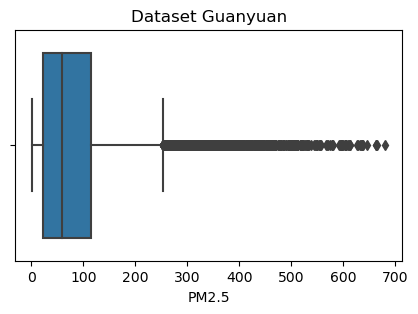

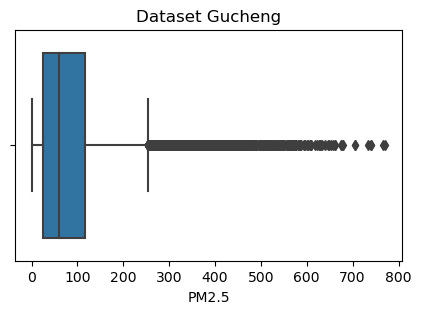

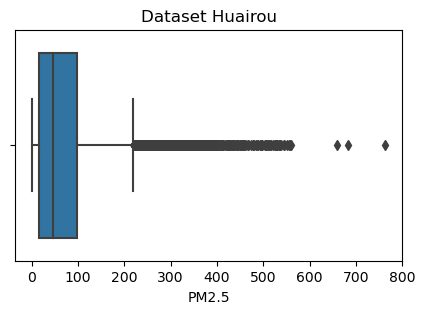

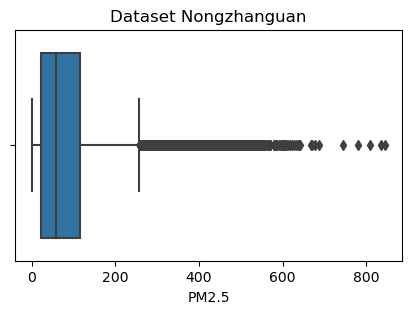

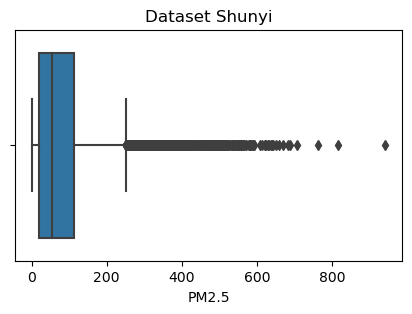

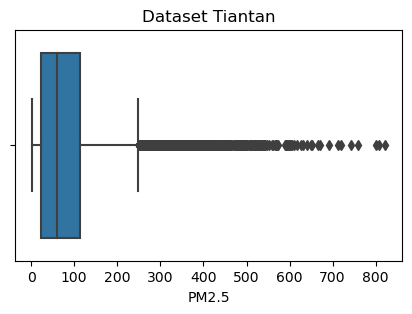

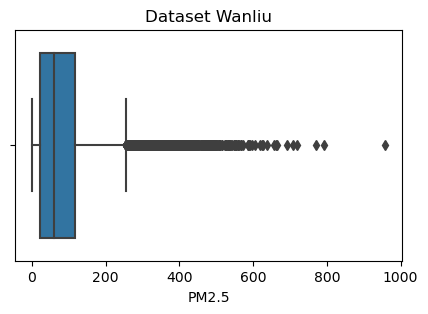

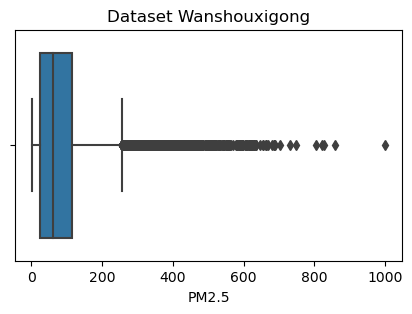

----------------------------------------------
*************Box Plot Kolom PM10*************


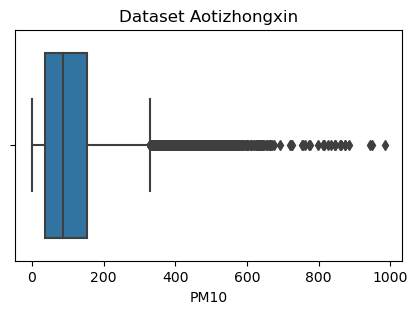

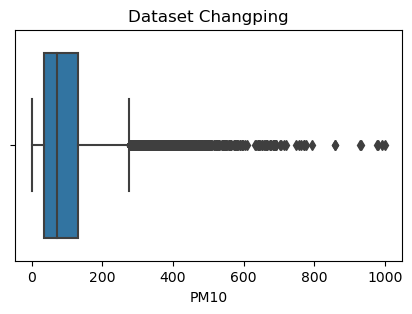

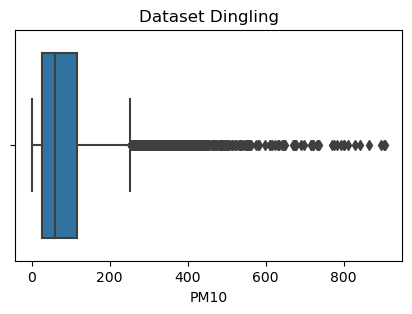

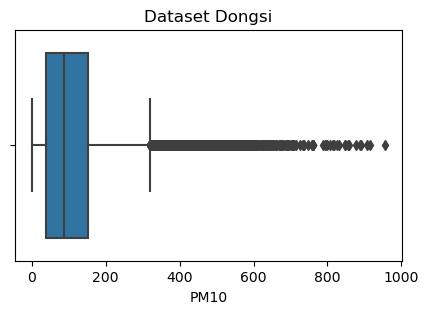

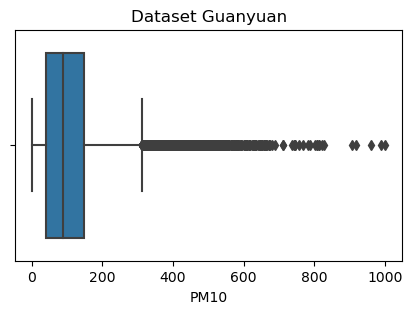

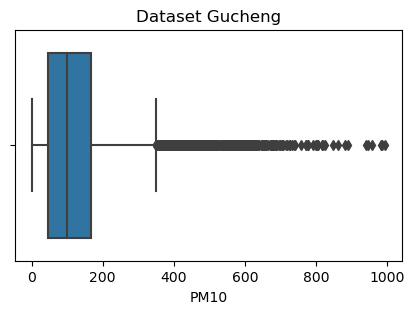

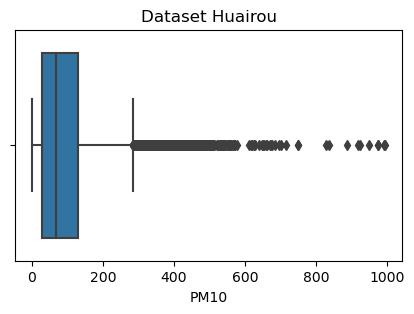

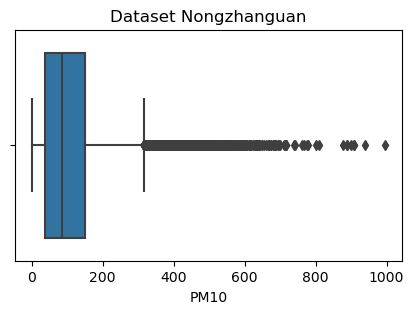

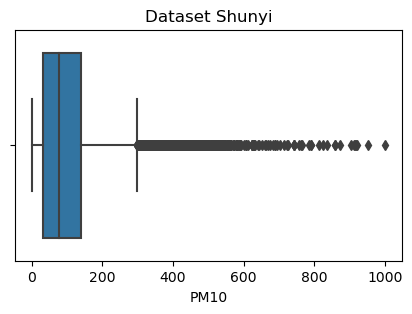

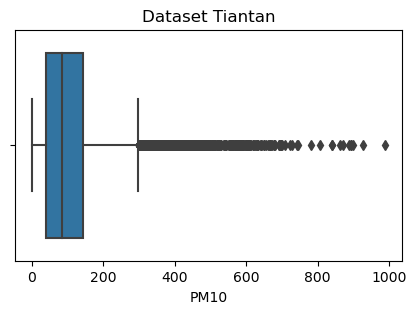

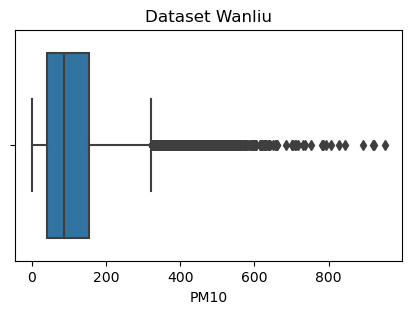

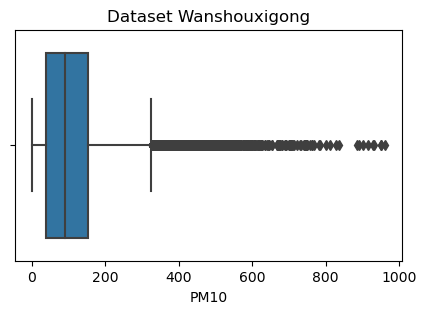

---------------------------------------------
*************Box Plot Kolom SO2*************


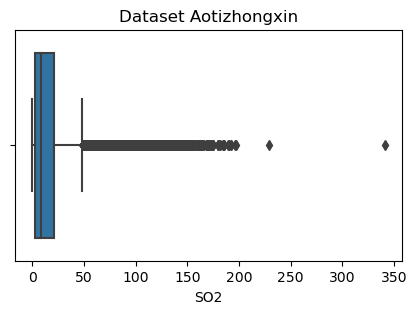

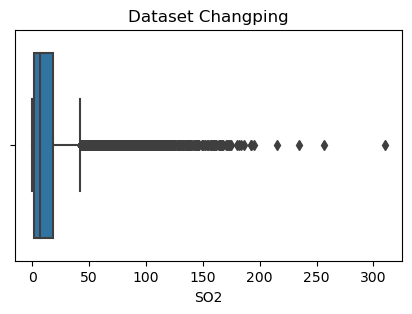

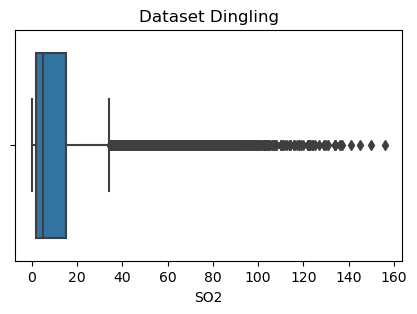

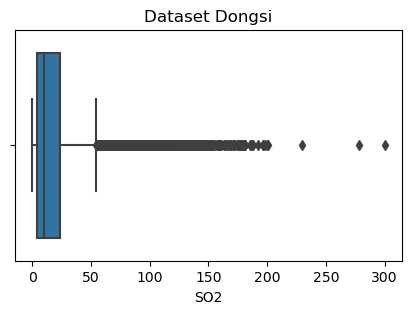

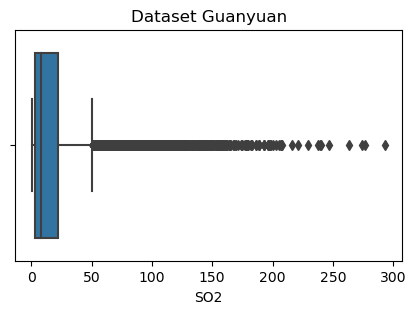

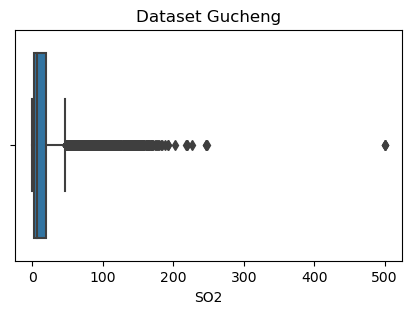

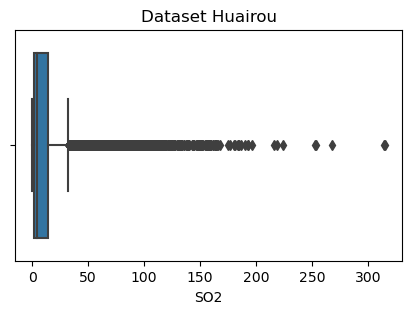

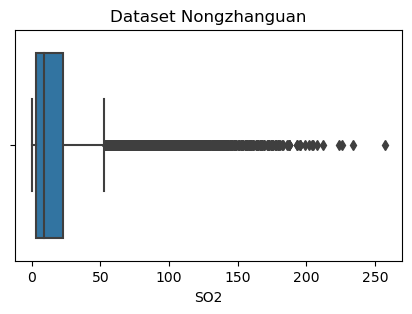

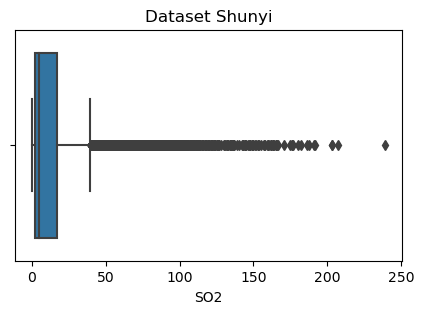

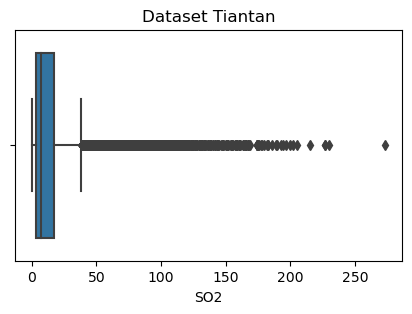

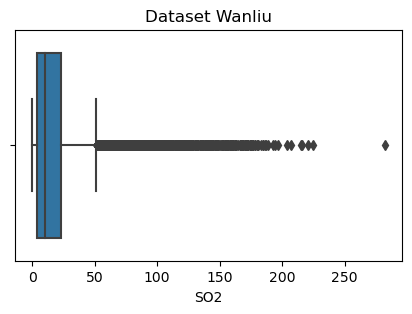

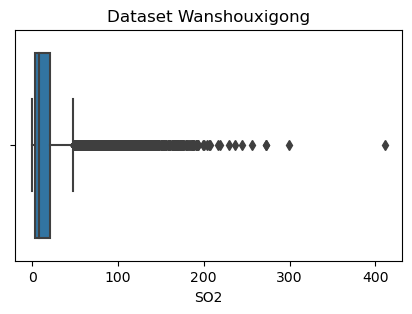

--------------------------------------------
*************Box Plot Kolom NO2*************


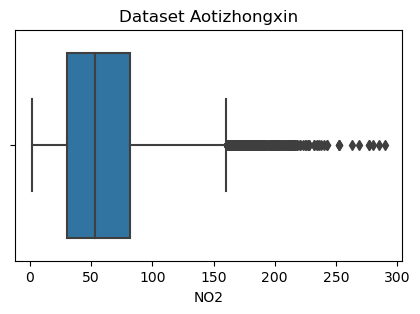

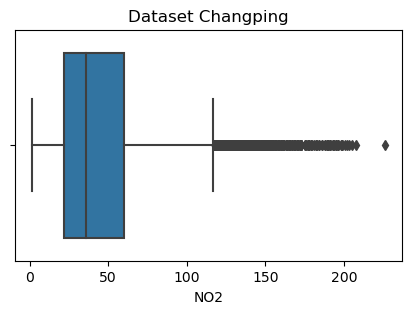

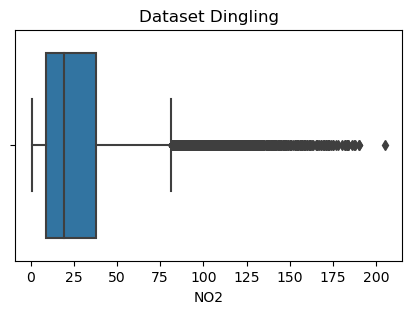

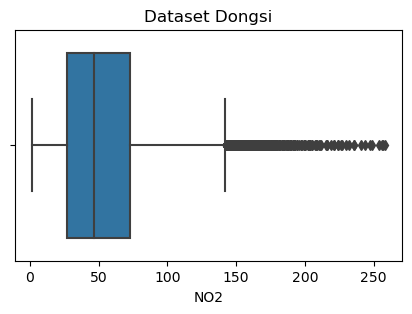

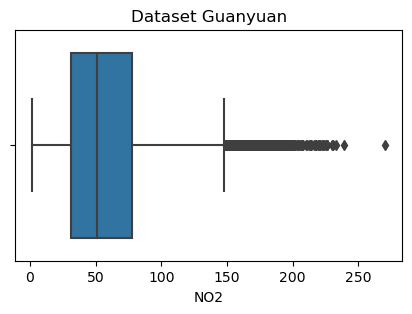

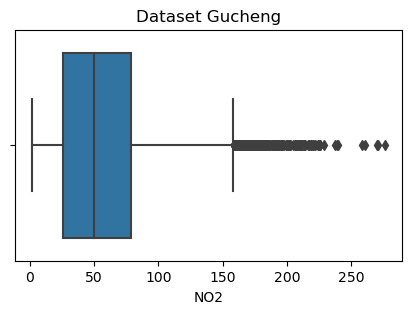

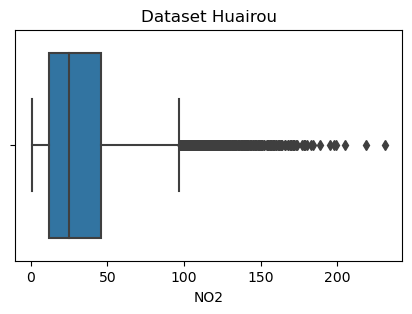

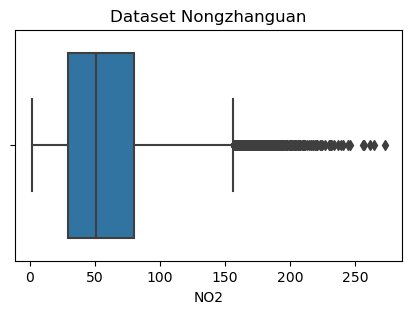

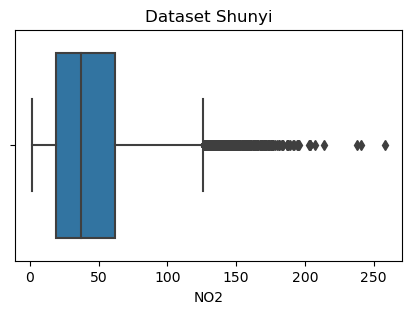

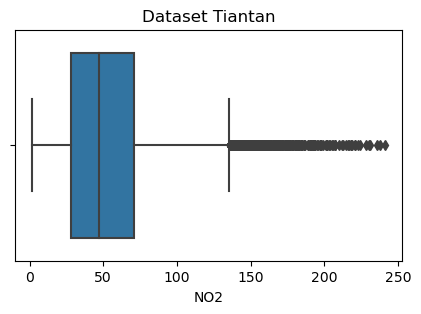

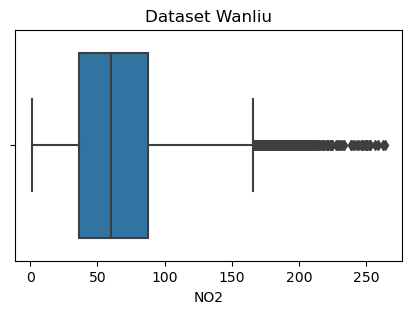

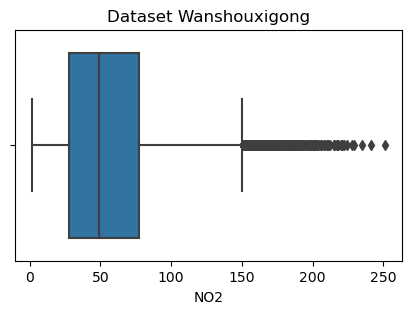

--------------------------------------------
*************Box Plot Kolom CO*************


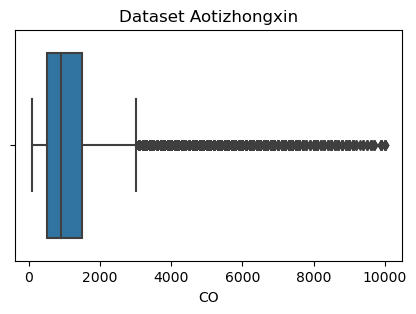

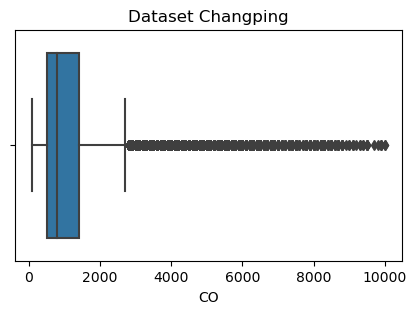

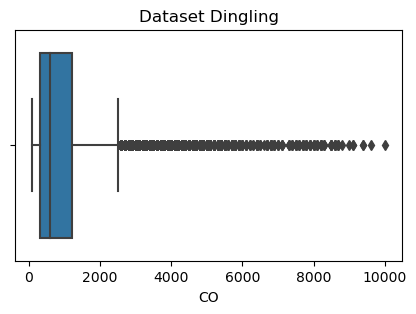

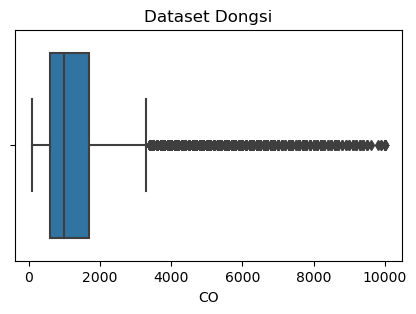

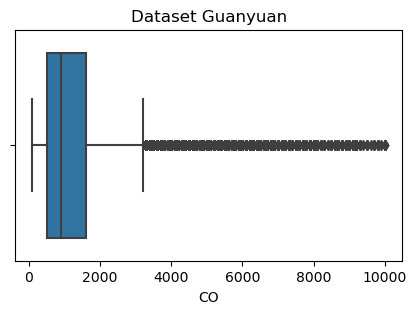

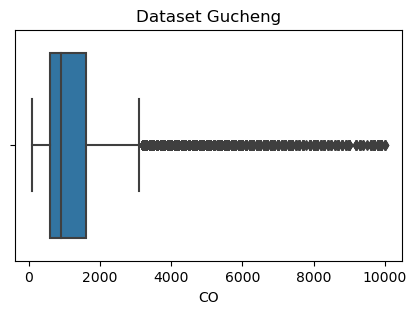

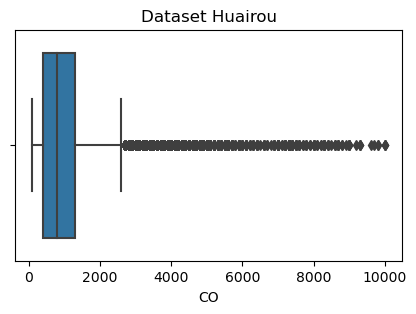

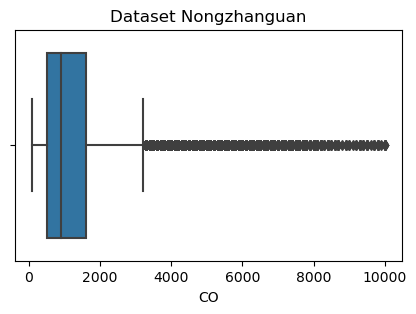

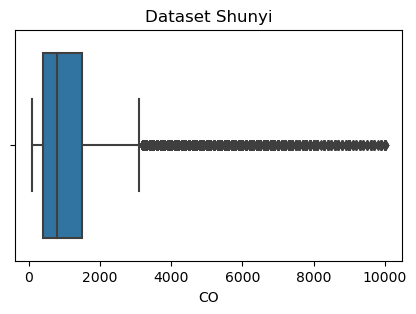

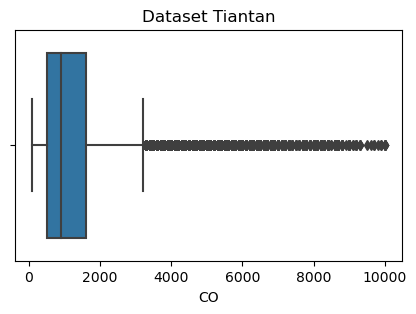

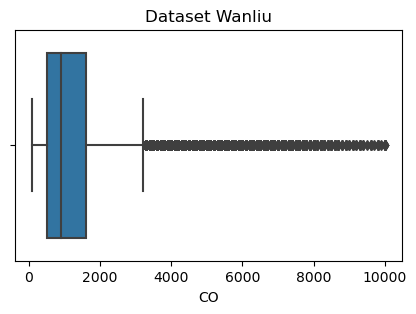

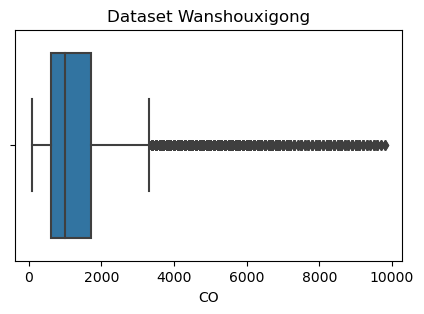

-------------------------------------------
*************Box Plot Kolom O3*************


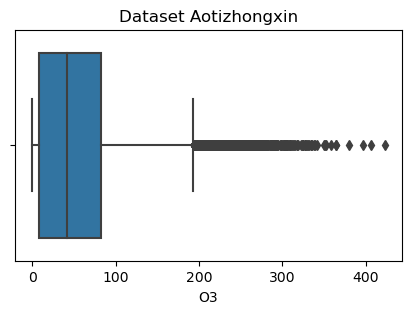

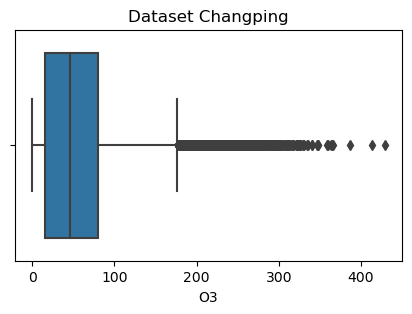

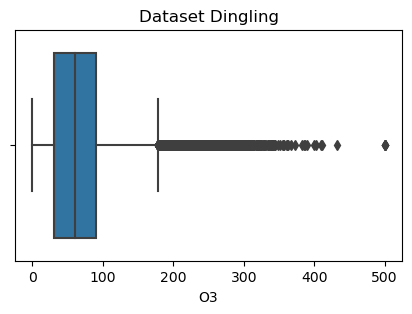

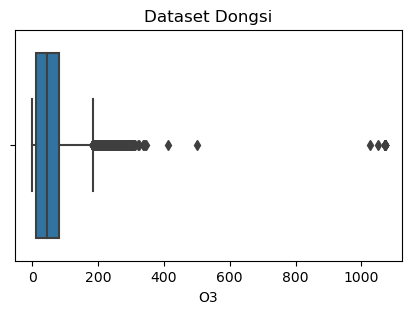

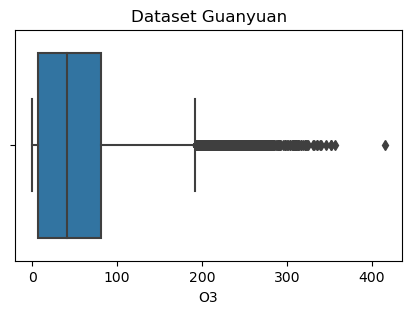

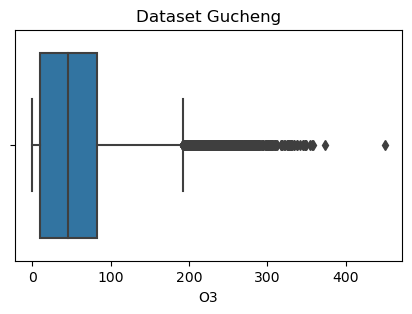

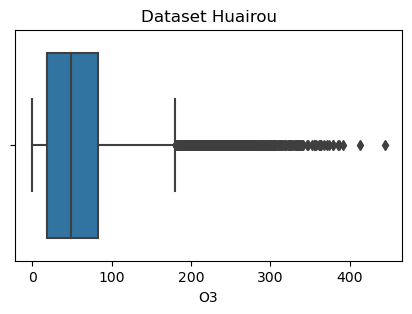

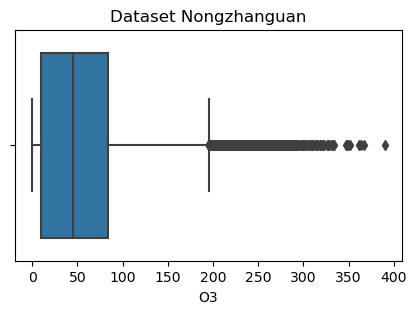

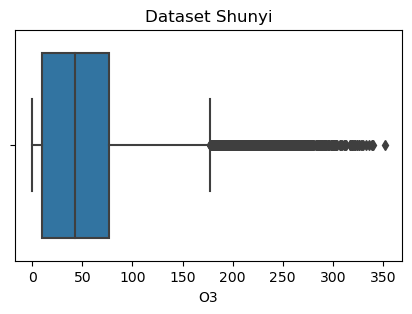

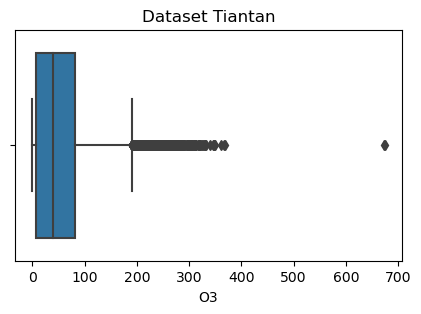

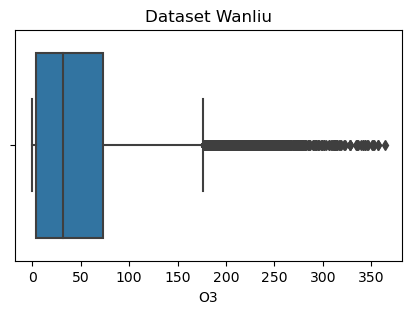

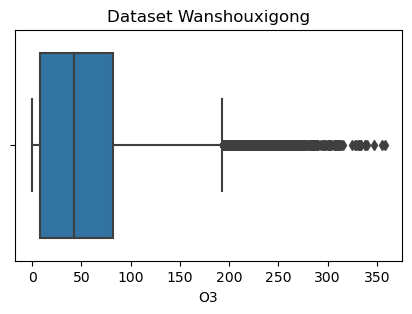

-------------------------------------------
*************Box Plot Kolom TEMP*************


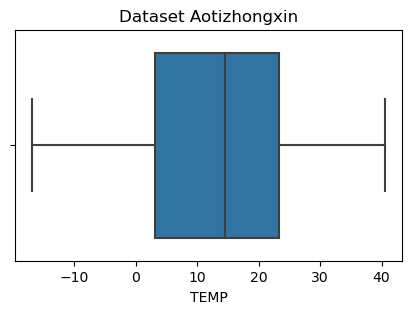

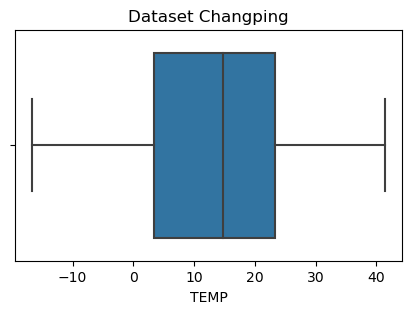

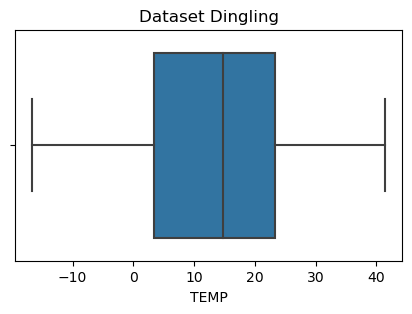

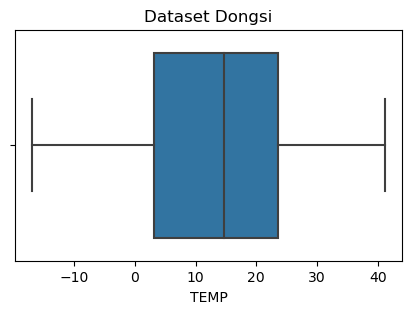

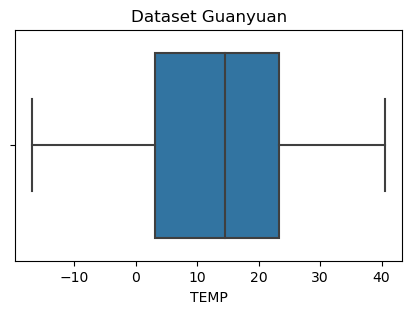

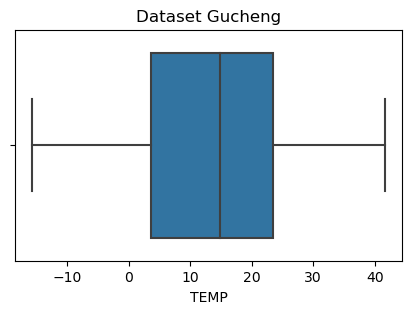

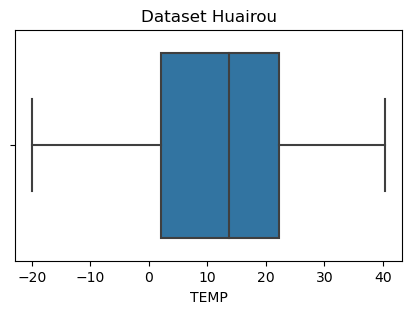

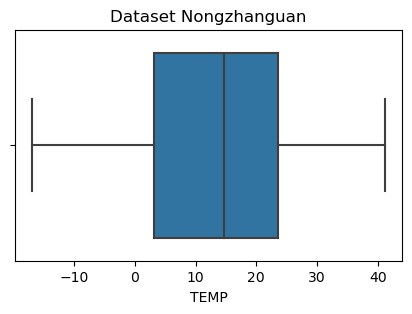

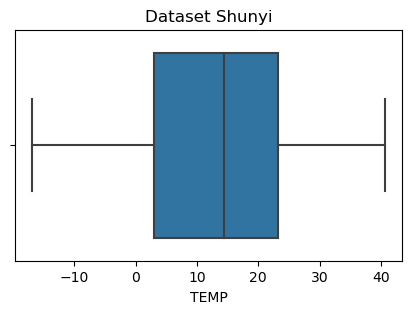

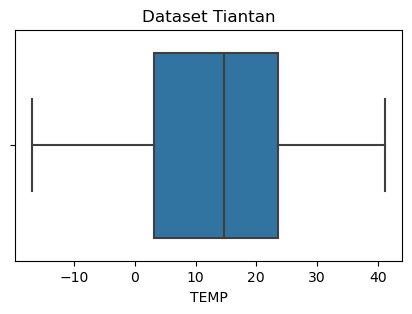

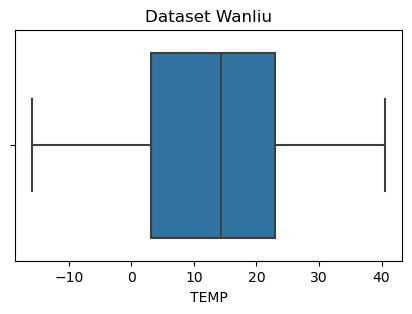

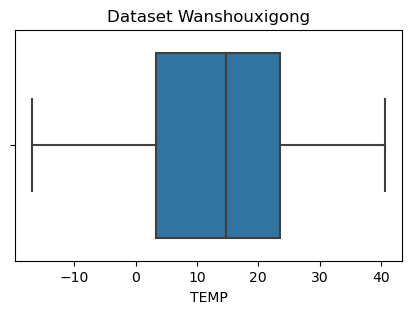

---------------------------------------------
*************Box Plot Kolom PRES*************


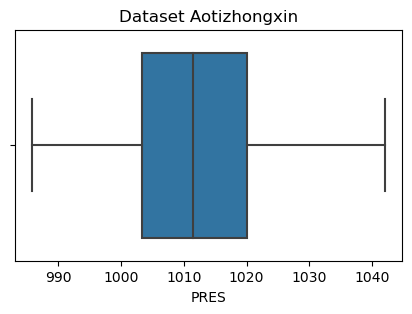

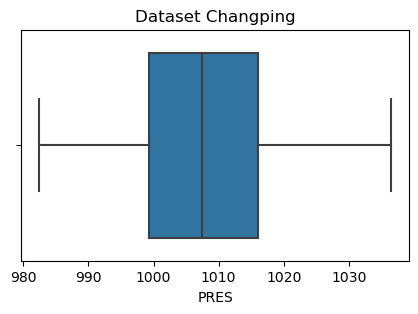

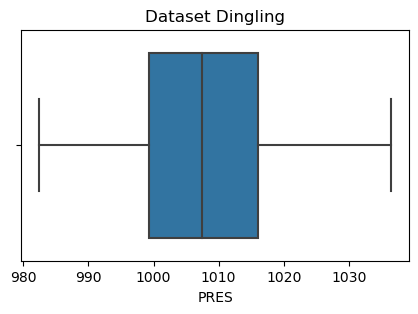

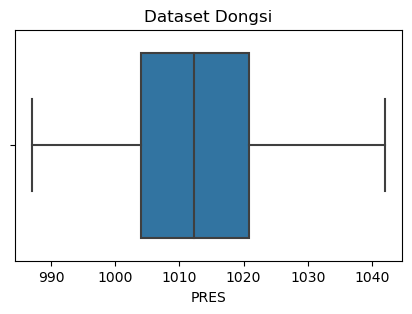

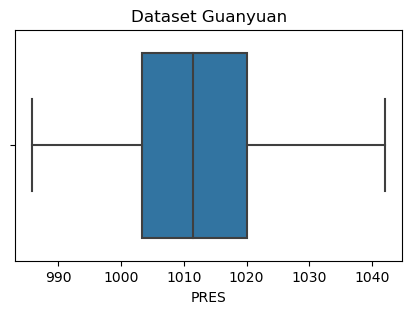

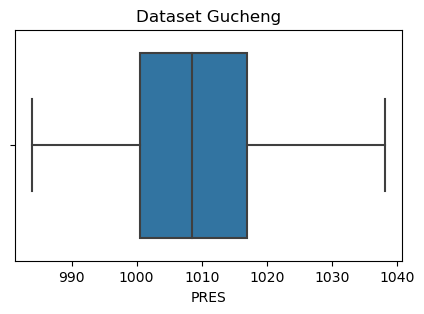

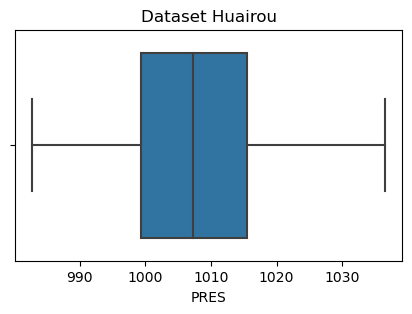

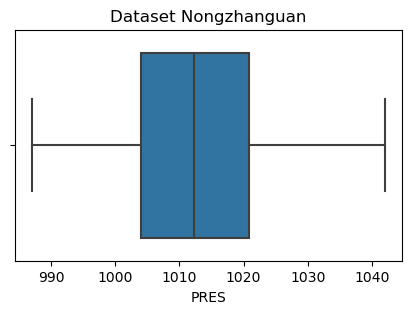

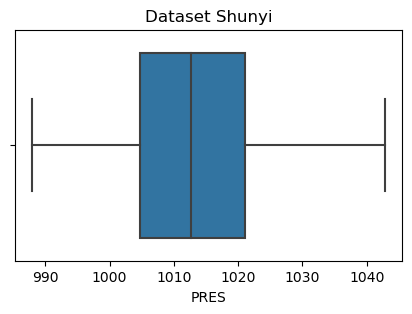

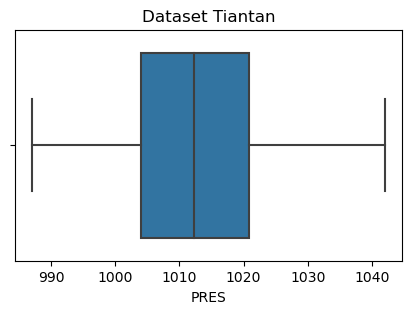

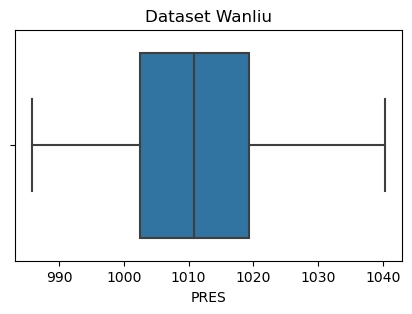

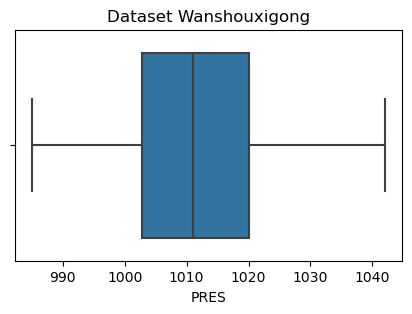

---------------------------------------------
*************Box Plot Kolom DEWP*************


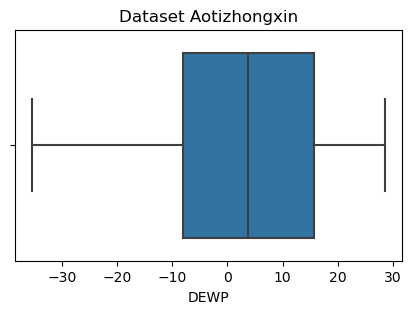

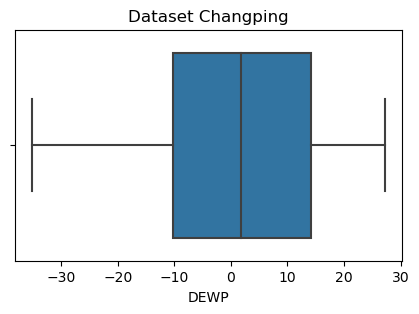

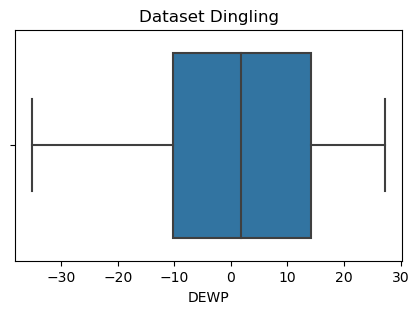

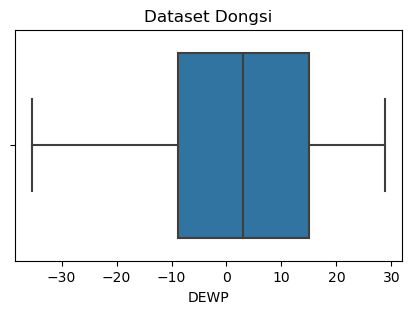

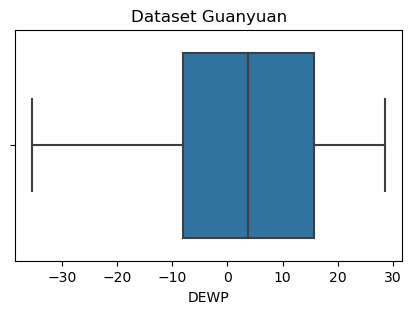

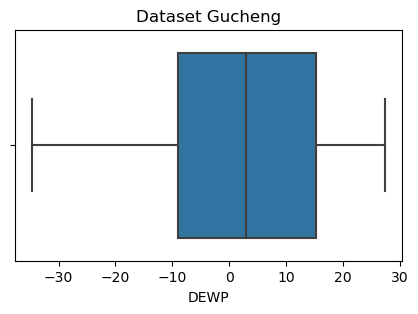

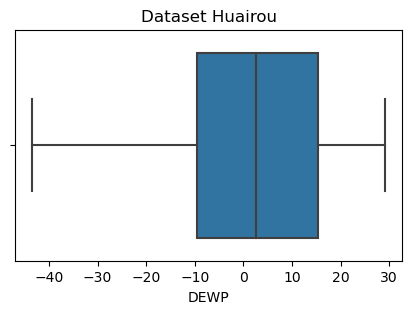

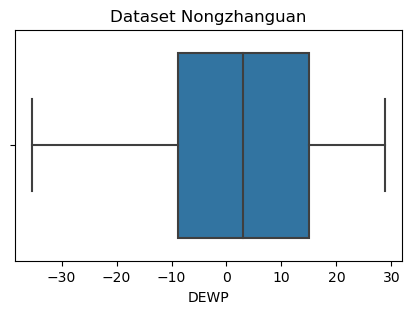

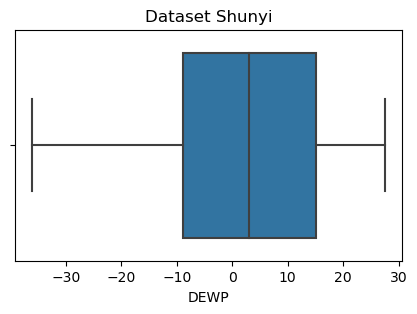

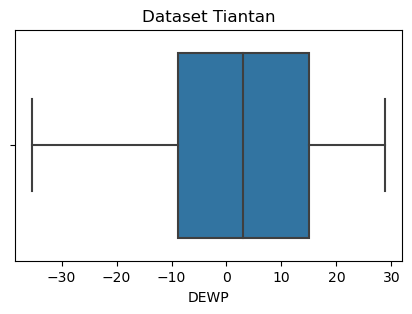

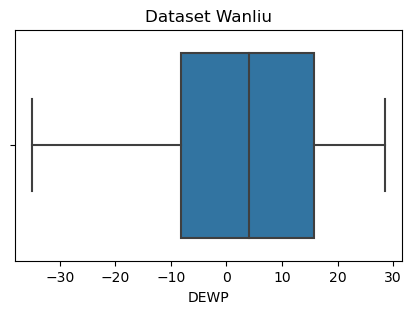

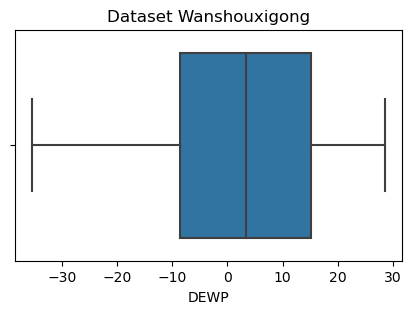

---------------------------------------------
*************Box Plot Kolom RAIN*************


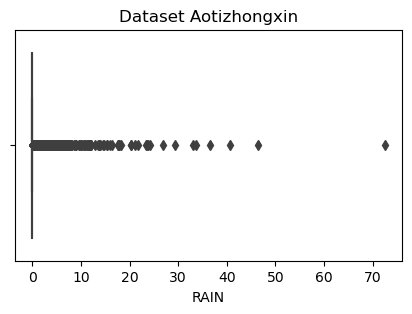

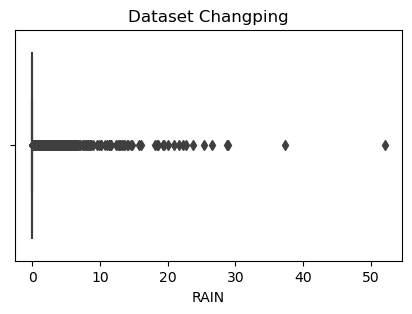

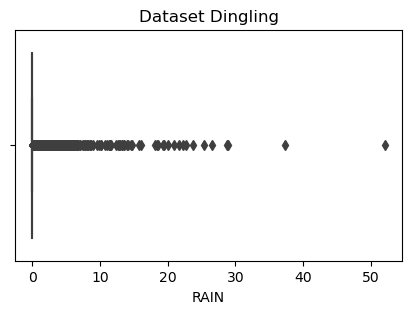

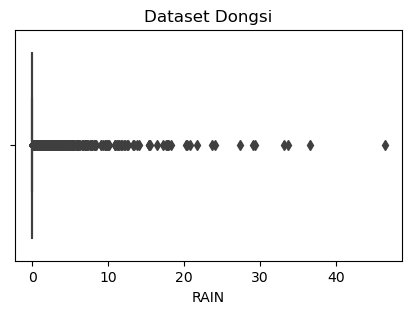

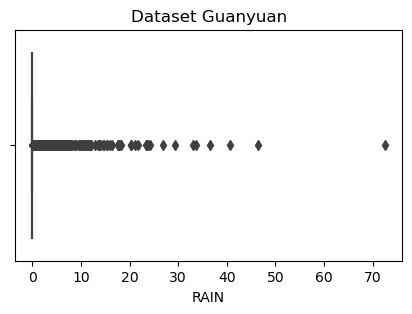

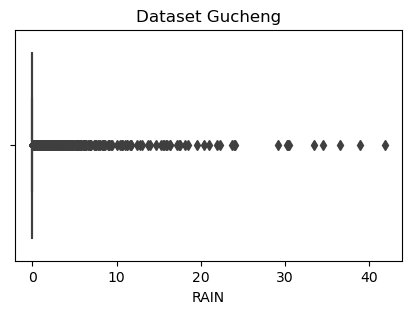

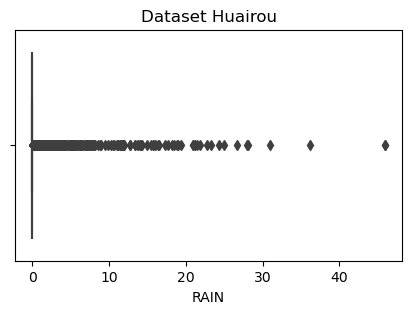

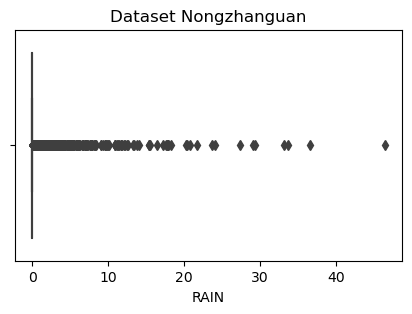

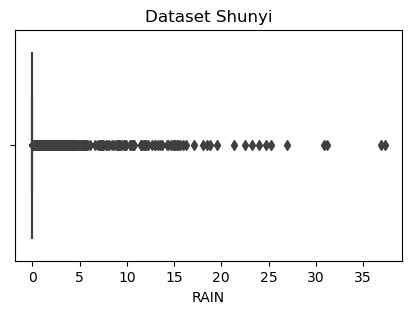

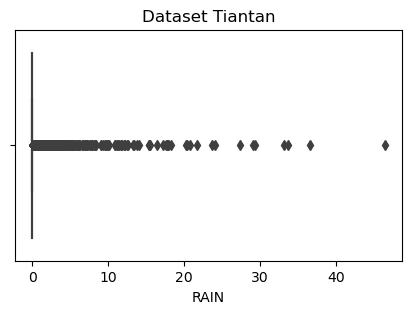

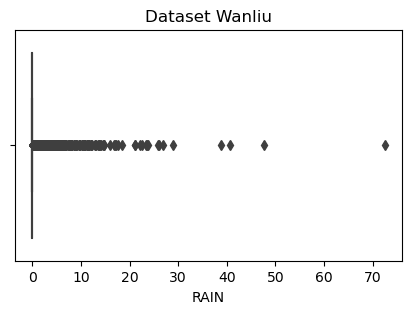

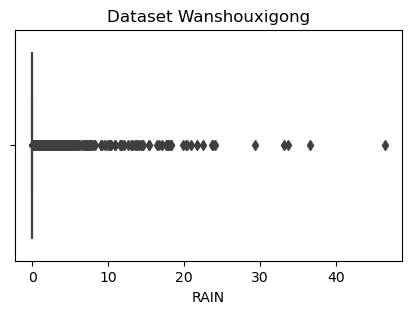

---------------------------------------------
*************Box Plot Kolom WSPM*************


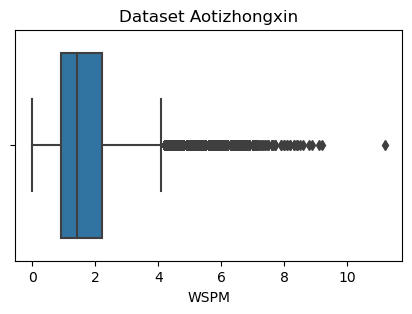

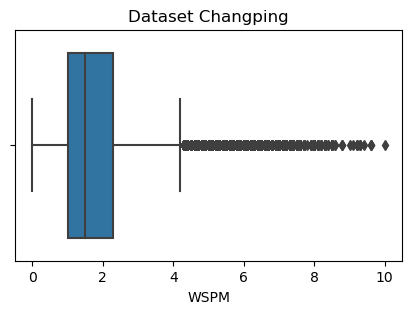

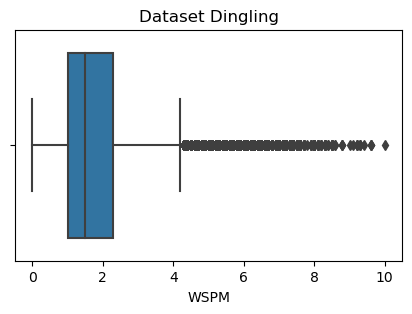

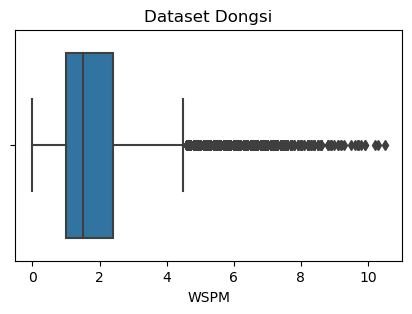

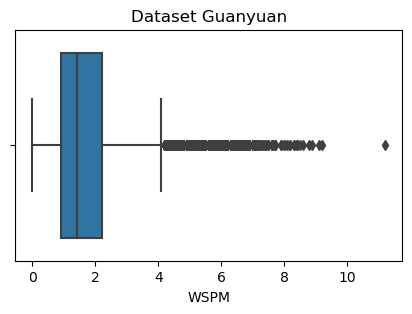

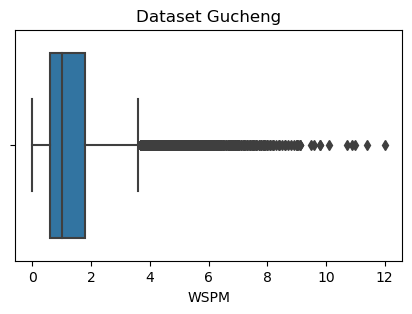

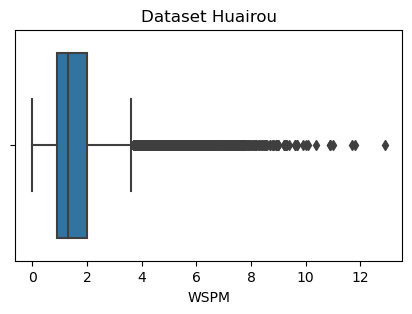

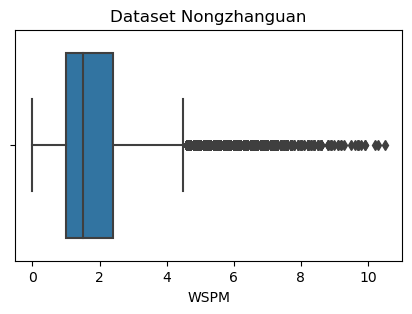

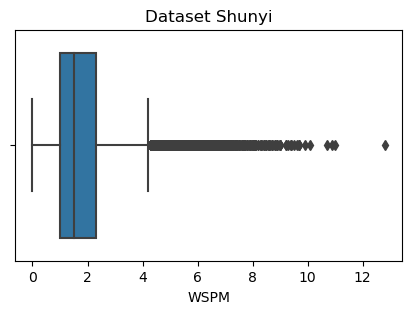

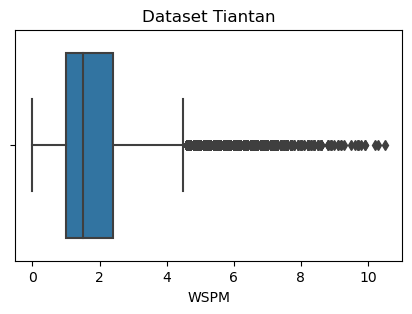

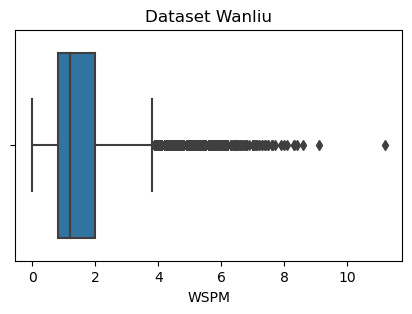

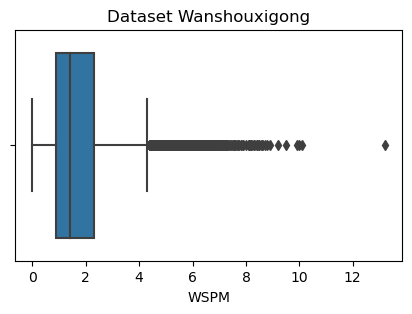

---------------------------------------------



In [10]:
# membuat box plot untuk assesing outlier
null_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

for i in null_columns:
    print(f'*************Box Plot Kolom {i}*************')
    for df in dataframes:
        df_temp = df[i].copy()
        df_temp = df_temp.sort_values(ascending=False).reset_index()
        plt.figure(figsize=(5, 3))
        sns.boxplot(x=df_temp[i])
        # Tampilkan plot
        plt.title(f'Dataset {df["station"].mode().iloc[0]}')
        plt.show()
    print("-"*len(f'*************Box Plot Kolom {i}*************'))
print('')

In [11]:
# Melihat jumlah outlier
null_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
for i in null_columns:
    mesage = f'*************Jumlah outlier Kolom "{i}" *************'
    print(mesage)
    for df in dataframes:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_temp = df[i][(df[i] < lower_bound) | (df[i] > upper_bound)]  # Use | for 'or' condition
        print(f"Jumlah outlier dataset '{df['station'].mode().iloc[0]}' = {df_temp.sum()}")
    print("-" * len(mesage))
    print('')


*************Jumlah outlier Kolom "PM2.5" *************
Jumlah outlier dataset 'Aotizhongxin' = 539562.0
Jumlah outlier dataset 'Changping' = 480300.0
Jumlah outlier dataset 'Dingling' = 513897.0
Jumlah outlier dataset 'Dongsi' = 565742.0
Jumlah outlier dataset 'Guanyuan' = 505334.9
Jumlah outlier dataset 'Gucheng' = 538769.0
Jumlah outlier dataset 'Huairou' = 462299.0
Jumlah outlier dataset 'Nongzhanguan' = 606800.0
Jumlah outlier dataset 'Shunyi' = 499489.1
Jumlah outlier dataset 'Tiantan' = 524211.0
Jumlah outlier dataset 'Wanliu' = 526676.0
Jumlah outlier dataset 'Wanshouxigong' = 595473.0
-------------------------------------------------------

*************Jumlah outlier Kolom "PM10" *************
Jumlah outlier dataset 'Aotizhongxin' = 458607.5
Jumlah outlier dataset 'Changping' = 470928.0
Jumlah outlier dataset 'Dingling' = 473316.0
Jumlah outlier dataset 'Dongsi' = 568778.0
Jumlah outlier dataset 'Guanyuan' = 483995.1
Jumlah outlier dataset 'Gucheng' = 403291.0
Jumlah outlier 

In [12]:
# Melihat persentase outlier
null_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
for i in null_columns:
    message = f'*************Jumlah outlier Kolom "{i}" *************'
    print(message)
    for df in dataframes:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_temp = df[i][(df[i] < lower_bound) | (df[i] > upper_bound)]  # Use | for 'or' condition
        total_data = len(df[i])
        outlier_count = len(df_temp)
        percentage_outlier = (outlier_count / total_data) * 100
        print(f"Jumlah outlier dataset '{df['station'].mode().iloc[0]}' = {outlier_count} ({percentage_outlier:.2f}%)")
    print("-" * len(message))
    print('')


*************Jumlah outlier Kolom "PM2.5" *************
Jumlah outlier dataset 'Aotizhongxin' = 1624 (4.63%)
Jumlah outlier dataset 'Changping' = 1674 (4.77%)
Jumlah outlier dataset 'Dingling' = 1831 (5.22%)
Jumlah outlier dataset 'Dongsi' = 1622 (4.63%)
Jumlah outlier dataset 'Guanyuan' = 1504 (4.29%)
Jumlah outlier dataset 'Gucheng' = 1584 (4.52%)
Jumlah outlier dataset 'Huairou' = 1626 (4.64%)
Jumlah outlier dataset 'Nongzhanguan' = 1765 (5.03%)
Jumlah outlier dataset 'Shunyi' = 1501 (4.28%)
Jumlah outlier dataset 'Tiantan' = 1592 (4.54%)
Jumlah outlier dataset 'Wanliu' = 1566 (4.47%)
Jumlah outlier dataset 'Wanshouxigong' = 1727 (4.93%)
-------------------------------------------------------

*************Jumlah outlier Kolom "PM10" *************
Jumlah outlier dataset 'Aotizhongxin' = 1080 (3.08%)
Jumlah outlier dataset 'Changping' = 1313 (3.74%)
Jumlah outlier dataset 'Dingling' = 1430 (4.08%)
Jumlah outlier dataset 'Dongsi' = 1335 (3.81%)
Jumlah outlier dataset 'Guanyuan' = 1186

hampir di semua kolom setiap dataset memiliki banyak outlier, kemungkinan outlier ini merupakan data asli.

### Cleaning Data

#### Membuat kolom date sebagai index

membuat kolom date yang berformat datetime untuk mempermudah interpolasi

In [13]:
# membuat kolom 'date' disemua dataset
for df in dataframes:
    df['date'] = pd.to_datetime(df[["year", "month", "day","hour"]])
  # membuat kolom "date" sebagai index
    df.set_index("date", inplace=True)

In [14]:
# memeriksa kembali data frame
for df in dataframes:
    print(f"*****Index Dataset {df['station'].mode().iloc[0]}*****")
    print(df.index)
    print("--"*len(f"*****Index Dataset {df['station'].mode().iloc[0]}*****"))
    print("")

*****Index Dataset Aotizhongxin*****
DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 01:00:00',
               '2013-03-01 02:00:00', '2013-03-01 03:00:00',
               '2013-03-01 04:00:00', '2013-03-01 05:00:00',
               '2013-03-01 06:00:00', '2013-03-01 07:00:00',
               '2013-03-01 08:00:00', '2013-03-01 09:00:00',
               ...
               '2017-02-28 14:00:00', '2017-02-28 15:00:00',
               '2017-02-28 16:00:00', '2017-02-28 17:00:00',
               '2017-02-28 18:00:00', '2017-02-28 19:00:00',
               '2017-02-28 20:00:00', '2017-02-28 21:00:00',
               '2017-02-28 22:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='date', length=35064, freq=None)
------------------------------------------------------------------------

*****Index Dataset Changping*****
DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 01:00:00',
               '2013-03-01 02:00:00', '2013-03-01 03:00:00',
               '2013-03-01 

terlihat index pada dataset telah berubah menjadi format tanggal, maka kita akan melakukan validaasi

In [15]:
# mencocokkan index (validasi)
reference_index = dataframes[0].index

# Loop melalui dataframes yang lain dan periksa kesamaan indeks
for df in dataframes[1:]:
    if df.index.equals(reference_index):
        print(f"Indeks dataframe {df['station'].mode().iloc[0]} sama dengan indeks dataframe pertama.")
    else:
        print(f"Indeks dataframe {df['station'].mode().iloc[0]} berbeda dengan indeks dataframe pertama.")


Indeks dataframe Changping sama dengan indeks dataframe pertama.
Indeks dataframe Dingling sama dengan indeks dataframe pertama.
Indeks dataframe Dongsi sama dengan indeks dataframe pertama.
Indeks dataframe Guanyuan sama dengan indeks dataframe pertama.
Indeks dataframe Gucheng sama dengan indeks dataframe pertama.
Indeks dataframe Huairou sama dengan indeks dataframe pertama.
Indeks dataframe Nongzhanguan sama dengan indeks dataframe pertama.
Indeks dataframe Shunyi sama dengan indeks dataframe pertama.
Indeks dataframe Tiantan sama dengan indeks dataframe pertama.
Indeks dataframe Wanliu sama dengan indeks dataframe pertama.
Indeks dataframe Wanshouxigong sama dengan indeks dataframe pertama.


#### drop kolom yang tidak diperlukan

melakukan droping kolom 'No','year','month','day','hour' karena sudah digantikan oleh index yang berformat datetime

In [16]:
# drop kolom 'No','year','month','day','hour'
for df in dataframes:
    df.drop(labels=["No",'year','month','day','hour',], axis=1,inplace=True)

In [17]:
# memastikan kolom telah di drop
for df in dataframes:
    print(f"*****Kolom Dataset {df['station'].mode().iloc[0]}*****")
    print(df.columns)
    print("--"*len(f"*****Index Dataset {df['station'].mode().iloc[0]}*****"))
    print("")

*****Kolom Dataset Aotizhongxin*****
Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')
------------------------------------------------------------------------

*****Kolom Dataset Changping*****
Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')
------------------------------------------------------------------

*****Kolom Dataset Dingling*****
Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')
----------------------------------------------------------------

*****Kolom Dataset Dongsi*****
Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')
------------------------------------------------------------

*****Kolom Dataset Guanyuan*****
Index(['PM2.5'

#### Imputasi Null Value




##### Interpolasi Null Value Kolom ("PM2.5", "PM10")

In [18]:
check_null_values(dataframes)

Null value pada dataset Aotizhongxin
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64
-----------------
Null value pada dataset Changping
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64
-----------------
Null value pada dataset Dingling
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64
-----------------
Null value pada dataset Dongsi
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN

In [19]:
# interpolasi null values ("PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "RAIN", "DEWP", "WSPM")
null_columns = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP",
                "PRES", "RAIN","DEWP", "WSPM"]
# for loop untuk memperpendek kode
for df in dataframes:
    for i in null_columns:

        #interpolasi null value
        df[i].interpolate(method='time', inplace=True)

        # membulatkan nilai float 1 digit dibelakang
        df[i] = df[i].round(1)

In [20]:
# memeriksa null values
check_null_values(dataframes)

Null value pada dataset Aotizhongxin
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd         81
WSPM        0
station     0
dtype: int64
-----------------
Null value pada dataset Changping
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         140
WSPM         0
station      0
dtype: int64
-----------------
Null value pada dataset Dingling
PM2.5        0
PM10         0
SO2          0
NO2          2
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         140
WSPM         0
station      0
dtype: int64
-----------------
Null value pada dataset Dongsi
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd         78
WSPM        0
station     0
dtype: int64
-----

masih terdapat null value pada kolom SO2 yang tidak terisi menggunakan metode interpolasi. maka akan diisi oleh nilai modus.

In [21]:
for df in dataframes:
    # mengisi null value pada kolom num_wd
    df["NO2"] = df["NO2"].fillna(value=df["NO2"].mode().iloc[0])

In [22]:
check_null_values(dataframes)

Null value pada dataset Aotizhongxin
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd         81
WSPM        0
station     0
dtype: int64
-----------------
Null value pada dataset Changping
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         140
WSPM         0
station      0
dtype: int64
-----------------
Null value pada dataset Dingling
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         140
WSPM         0
station      0
dtype: int64
-----------------
Null value pada dataset Dongsi
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd         78
WSPM        0
station     0
dtype: int64
-----

kolom SO2 sudah tidak memiliki null value

##### Mengisi Null Values Kolom 'wd'

pengisisian null value pada kolom wd digunakan teknik interpolasi, mengingat angin bergerak seperti gelombang (memiliki pola tertentu) ketika terjadi perubahan arah, maka saya membuat kolom num_wd yang berisi derajat arah mata angin untuk mempermudah interpolasi

In [23]:
# menambahkan kolom num_wd yang berisi derajat arah mata angin
dict_wd = {"N": 0,"NNE": 22.5,"NE": 45,"ENE": 67.5,"E": 90,"ESE": 112.5,
           "SE": 135,"SSE": 157.5,"S": 180,"SSW": 202.5,"SW": 225,"WSW": 247.5,
           "W": 270,"WNW": 292.5,"NW": 315,"NNW": 337.5,}
for df in dataframes:
    df["num_wd"] = df["wd"].map(dict_wd)
    df["num_wd"].interpolate(method='time', inplace=True)


In [24]:
# memeriksa null value
check_null_values(dataframes)

Null value pada dataset Aotizhongxin
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd         81
WSPM        0
station     0
num_wd      0
dtype: int64
-----------------
Null value pada dataset Changping
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         140
WSPM         0
station      0
num_wd       0
dtype: int64
-----------------
Null value pada dataset Dingling
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         140
WSPM         0
station      0
num_wd       0
dtype: int64
-----------------
Null value pada dataset Dongsi
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd         78
WS

kolom num_wd sudah tidak memiliki null value

In [25]:
# membulatkan nilai kolom num_wd ke nilai terdekat di list value dict wd
# fungsi membulatkan nilai kolom ke terdekat ke list value
def round_to_nearest(value, rounding_list):
    return min(rounding_list, key=lambda x: abs(x - value))

# membuat list value dari dictionary dict_wd
dict_wd_list = list(dict_wd.values())

# looping setiap dataframe dan membulatkan num_wd
for df in dataframes:
    df["num_wd"] = df["num_wd"].apply(lambda x: round_to_nearest(x, dict_wd_list))

kolom num_wd dibulatkan ke nilai terdekat pada dict_wd_list untuk mempermudah imputasi kolom wd

In [26]:
# memeriksa jumlah value count pana num_wd
for df in dataframes:
    print(len(df["num_wd"].value_counts().index))

16
16
16
16
16
16
16
16
16
16
16
16


In [27]:
# melengkapi nilai wd
dict_swap = {
    0: 'N', 22.5: 'NNE', 45: 'NE', 67.5: 'ENE', 90: 'E', 112.5: 'ESE',
    135: 'SE', 157.5: 'SSE', 180: 'S', 202.5: 'SSW', 225: 'SW',
    247.5: 'WSW', 270: 'W', 292.5: 'WNW', 315: 'NW', 337.5: 'NNW'
}

for df in dataframes:
    # Menyalin nilai num_wd yang telah diinterpolasi
    df['wd'] = df["num_wd"].copy()
    # Mengisi nilai df['wd'] berdasarkan kamus 'dict_swap'
    df['wd'].replace(dict_swap, inplace=True)
    df.drop(labels=['num_wd'], axis=1,inplace=True)



merubah derajat arah menjadi simbol arah mata angin dan membuang kolom num_wd yang sudah tidak diperlukan

In [28]:
# memeriksa jumlah value count pada kolom wd di semua dataset
for df in dataframes:
    print(len(df["wd"].value_counts().index))

16
16
16
16
16
16
16
16
16
16
16
16


kolom wd telah berhasil diimputasi

In [29]:
# memeriksa null values
check_null_values(dataframes)

Null value pada dataset Aotizhongxin
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64
-----------------
Null value pada dataset Changping
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64
-----------------
Null value pada dataset Dingling
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64
-----------------
Null value pada dataset Dongsi
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64
-----------------
Null value pada dataset Guanyuan
PM2.5      0
PM10       0
SO2   

## Exploratory Data Analysis

### membuat dataframe rata-rata dari semua dataset

In [30]:
# membuat dataframe yang berisi mean dari semua dataset
numeric_columns = [col for col in df_Aotizhongxin.columns if
                   pd.api.types.is_numeric_dtype(df_Aotizhongxin[col])]
df_mean = pd.DataFrame(0, columns=numeric_columns, index=df_Aotizhongxin.index)

# mengisi kolom numerik dengan mean tiap index tiap kolom dari 12 dataset
for col in numeric_columns:
    df_tempor = pd.DataFrame(0, columns=[col], index=df_Aotizhongxin.index)
    for df in dataframes:
        df_tempor = pd.concat([df_tempor, df[col]], axis=1)
    df_mean[col] = round(df_tempor.mean(axis=1),1)

# mengisi kolom wd dengan modus dari 12 dataset
df_tempor = pd.DataFrame(0, columns=['wd'], index=df_Aotizhongxin.index)
for df in dataframes:
    df_tempor = pd.concat([df_tempor, df['wd']], axis=1)
df_mean['wd'] = df_tempor.mode(axis=1).iloc[:, 0]


In [31]:
df_mean

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
date,,,,,,,,,,,,
2013-03-01 00:00:00,5.2,7.3,5.2,10.8,284.6,69.6,-0.8,944.1,-18.4,0.0,3.9,NNW
2013-03-01 01:00:00,6.3,9.1,4.9,10.3,284.6,69.9,-1.1,944.5,-18.4,0.0,3.6,NW
2013-03-01 02:00:00,5.2,6.7,5.9,11.0,276.9,60.9,-1.5,944.6,-19.4,0.0,4.1,NNW
2013-03-01 03:00:00,5.5,8.5,5.4,10.7,276.9,61.0,-1.7,945.4,-20.2,0.0,3.1,NW
2013-03-01 04:00:00,4.5,6.4,6.2,11.0,284.6,61.2,-2.1,946.0,-20.0,0.0,2.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,14.8,35.5,3.3,26.9,376.9,63.0,11.1,934.1,-14.0,0.0,2.0,NW
2017-02-28 20:00:00,17.5,35.2,4.7,38.5,492.3,52.2,10.1,934.3,-13.1,0.0,1.2,WNW
2017-02-28 21:00:00,14.5,30.5,4.6,37.7,515.4,49.8,9.3,934.7,-12.5,0.0,1.2,NW


### melihat korelasi antara tiap parameter angka di df_mean

In [32]:
# melihat korelasi antara tiap parameter angka di df_mean.
corr_df = df_mean.corr(numeric_only=True)
corr_df

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.904361,0.515187,0.746820,0.824092,-0.154137,-0.139813,0.008496,0.111186,-0.021119,-0.330525
PM10,0.904361,1.000000,0.498829,0.711353,0.730677,-0.104624,-0.104678,-0.032460,0.062080,-0.040361,-0.217445
SO2,0.515187,0.498829,1.000000,0.570379,0.569896,-0.188380,-0.360420,0.239391,-0.302998,-0.059279,-0.142994
NO2,0.746820,0.711353,0.570379,1.000000,0.779704,-0.492438,-0.336584,0.172650,-0.061528,-0.069938,-0.520413
CO,0.824092,0.730677,0.569896,0.779704,1.000000,-0.339852,-0.360818,0.198020,-0.077858,-0.020514,-0.365460
O3,-0.154137,-0.104624,-0.188380,-0.492438,-0.339852,1.000000,0.632802,-0.481075,0.343856,0.032356,0.353390
TEMP,-0.139813,-0.104678,-0.360420,-0.336584,-0.360818,0.632802,1.000000,-0.839148,0.829392,0.057032,0.027802
PRES,0.008496,-0.032460,0.239391,0.172650,0.198020,-0.481075,-0.839148,1.000000,-0.777831,-0.085697,0.070149
DEWP,0.111186,0.062080,-0.302998,-0.061528,-0.077858,0.343856,0.829392,-0.777831,1.000000,0.116978,-0.339134
RAIN,-0.021119,-0.040361,-0.059279,-0.069938,-0.020514,0.032356,0.057032,-0.085697,0.116978,1.000000,0.026098


In [33]:
# melihat korelasi lebih dari 0.3/-0.3 antara kolom di df_mean dan memisahkannya
coba_index = corr_df.columns
pos_list = []
neg_list = []
for i in coba_index:
    for u in coba_index:
        if u == i:
            pass
    else:
        temp_df = pd.DataFrame(zip(df_mean[u], df_mean[i]), columns=[u,i])
        corelate = temp_df.corr(numeric_only=True)
        corelate = corelate.iloc[0,1]
        if corelate > 0.3:
            mesagge = f'"{u}" dan "{i}"'
            mesagge2 = f'"{i}" dan "{u}"'
            if (mesagge in pos_list) or (mesagge2 in pos_list):
                pass
            else:
                pos_list.append(mesagge)
        elif corelate < -0.3:
            mesagge = f'"{u}" dan "{i}"'
            mesagge2 = f'"{i}" dan "{u}"'
            if (mesagge in neg_list) or (mesagge2 in neg_list):
                pass
            else:
                neg_list.append(mesagge)
print('-'*len("*******list korelasi positif*******"))
print("*******list korelasi positif*******")
print('-'*len("*******list korelasi positif*******"))
for i in pos_list:
    print(i)
print('')
print('-'*len("*******list korelasi negatif*******"))
print("*******list korelasi negatif*******")
print('-'*len("*******list korelasi negatif*******"))
for i in neg_list:
    print(i)



-----------------------------------
*******list korelasi positif*******
-----------------------------------
"WSPM" dan "O3"
"WSPM" dan "WSPM"

-----------------------------------
*******list korelasi negatif*******
-----------------------------------
"WSPM" dan "PM2.5"
"WSPM" dan "NO2"
"WSPM" dan "CO"
"WSPM" dan "DEWP"


### statistik deskripsi df_mean

In [34]:
#@markdown melihat deskripsi statistik untuk kolom yang memiliki null value selain yang bertipe data numerik
df_mean.describe(include='all')

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4230
mean,73.698018,96.840047,14.687503,46.707064,1140.629945,52.835050,12.490603,933.003020,2.291712,0.059215,1.596840,NaN
std,70.206438,78.129783,18.159378,26.895160,963.250163,49.284185,10.521837,9.426151,12.672533,0.556611,0.967589,NaN
min,3.000000,3.800000,1.100000,3.700000,115.400000,1.200000,-15.300000,909.600000,-32.200000,0.000000,0.100000,NaN
25%,21.300000,38.000000,3.300000,25.900000,523.100000,14.400000,2.900000,925.100000,-8.300000,0.000000,0.900000,NaN
50%,53.500000,79.800000,7.500000,42.000000,846.200000,40.500000,13.400000,932.800000,2.700000,0.000000,1.300000,NaN
75%,100.600000,130.600000,18.500000,62.100000,1407.550000,72.900000,21.425000,940.700000,14.000000,0.000000,2.000000,NaN


### mengambil nilai df_mean hanya pada tahun 2016

In [35]:
# mengambil nilai dataframe df_mean

# menyalin nilai dataframe df_mean hanya untuk tahun 2016
df_mean_2016 = df_mean.copy()
# mengolah dataframe untuk mempermudah visualisasi
#df_mean_2016 = preprocess_dataframe(df_mean_2016)
df_mean_2016 = df_mean_2016.loc['2016']
# cek dataframe 2016
df_mean_2016

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
date,,,,,,,,,,,,
2016-01-01 00:00:00,151.9,166.8,28.2,88.6,3469.2,7.0,-3.0,944.2,-8.0,0.0,1.0,NNE
2016-01-01 01:00:00,148.0,158.7,30.1,85.4,3400.0,7.2,-3.6,943.5,-7.6,0.0,0.9,NE
2016-01-01 02:00:00,140.6,149.8,29.5,83.7,3123.1,6.5,-4.3,943.4,-7.6,0.0,0.7,ENE
2016-01-01 03:00:00,131.2,136.8,26.7,82.8,2907.7,6.2,-3.9,942.9,-7.8,0.0,1.1,ENE
2016-01-01 04:00:00,120.2,122.9,23.0,82.0,2776.9,6.5,-4.8,942.2,-7.8,0.0,0.9,E
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,330.4,376.4,17.1,142.5,4323.1,3.2,-2.1,941.9,-6.9,0.0,0.8,ESE
2016-12-31 20:00:00,344.7,398.6,17.4,136.2,4530.8,3.3,-2.5,942.2,-6.5,0.0,0.9,ENE
2016-12-31 21:00:00,363.9,424.3,14.9,130.5,4723.1,3.4,-3.0,942.0,-6.4,0.0,1.0,E


### membuat dataframe untuk menjawab pertanyaan

In [36]:
df_debu = pd.DataFrame(df_mean_2016[['PM2.5','PM10']])
df_debu['Dust'] = df_debu.sum(axis=1)
df_debu.drop(labels=['PM2.5','PM10'], axis=1,inplace=True)
df_debu = preprocess_dataframe(df_debu)
df_debu

,Dust,tanggal,hari angka,hari,pukul
date,,,,,
2016-01-01 00:00:00,318.7,2016-01-01 00:00:00,4,Jumat,0
2016-01-01 01:00:00,306.7,2016-01-01 01:00:00,4,Jumat,1
2016-01-01 02:00:00,290.4,2016-01-01 02:00:00,4,Jumat,2
2016-01-01 03:00:00,268.0,2016-01-01 03:00:00,4,Jumat,3
2016-01-01 04:00:00,243.1,2016-01-01 04:00:00,4,Jumat,4
...,...,...,...,...,...
2016-12-31 19:00:00,706.8,2016-12-31 19:00:00,5,Sabtu,19
2016-12-31 20:00:00,743.3,2016-12-31 20:00:00,5,Sabtu,20
2016-12-31 21:00:00,788.2,2016-12-31 21:00:00,5,Sabtu,21


### Visualisasi

#### identifikasi pola

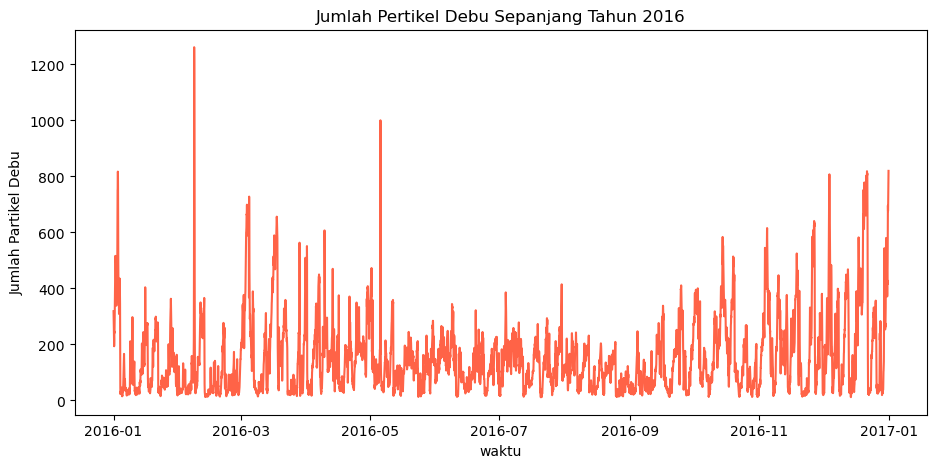

In [37]:
  # membuat visualisasi

fig = plt.figure(figsize =(11, 5))
list_warna = ['#FF6347']
my_palette = sns.color_palette(list_warna)
sns.set_palette(my_palette)
sns.lineplot(x=df_debu.index, y='Dust', data=df_debu)
plt.xlabel('waktu')
plt.ylabel('Jumlah Partikel Debu')
plt.title('Jumlah Pertikel Debu Sepanjang Tahun 2016')
plt.show()
print('')

dari bagan diatas diketahui partikel jumlah partikel debu terlihat memiliki pola tertentu, kemungkinan hal ini disebabkan oleh perbedaan iklim di kota beijing sepanjang tahun 2016.

### Pertanyaan 1: hari apa yang memiliki total konsentrasi debu (PM2.5, PM10) paling banyak di udara dari rata-rata 12 stasiun di beijing pada tahun 2016?

#### berdasarkan waktu pada tahun 2016

#### berdasarkan hari

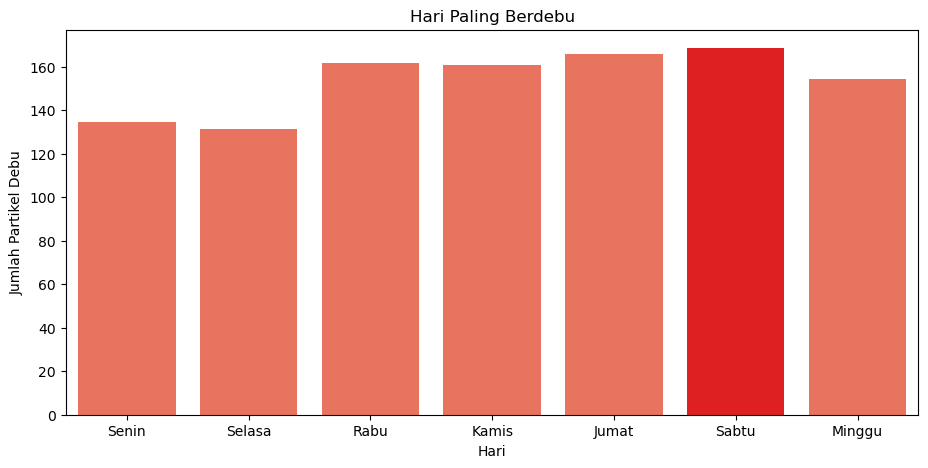

In [38]:
df_debu_hari = df_debu.copy()
df_debu_hari = df_debu_hari.sort_values(by='hari angka', ascending=True).reset_index()
df_debu_hari = df_debu_hari.groupby(df_debu_hari['hari angka'])['Dust'].mean()
df_debu_hari = pd.DataFrame(df_debu_hari)
df_debu_hari['hari'] =  df_debu_hari.index.map({0: 'Senin',
                                                  1: 'Selasa',
                                                  2: 'Rabu',
                                                  3: 'Kamis',
                                                  4: 'Jumat',
                                                  5: 'Sabtu',
                                                  6: 'Minggu'})
# visualisasi
# Membuat palet warna kustom
list_warna = []
for i in df_debu_hari['Dust']:
    if i == df_debu_hari['Dust'].max():
        list_warna.append('#FF0000')
    else:
        list_warna.append('#FF6347')

my_palette = sns.color_palette(list_warna)
sns.set_palette(my_palette)

# membuat visualisasi
fig = plt.figure(figsize =(11, 5))
sns.barplot(x='hari', y='Dust', data=df_debu_hari)
plt.xlabel(f'Hari')
plt.ylabel('Jumlah Partikel Debu')
plt.title('Hari Paling Berdebu')
plt.show()

dari hasil ploting diatas diketahui bahwa hari paling berdebu di beijing ketika hari sabtu.

### Pertanyaan 2: pukul berapa yang memiliki total konsentrasi debu (PM2.5, PM10) paling banyak  di udara dari rata-rata 12 stasiun di beijing  pada tahun 2016?

#### berdasarkan rata-rata pada pukul tertentu pada tahun 2016

membuat dataframe yang berisi rata-rata konsentrasi debu berdasarkan waktu, dan membuat visualisasinya 

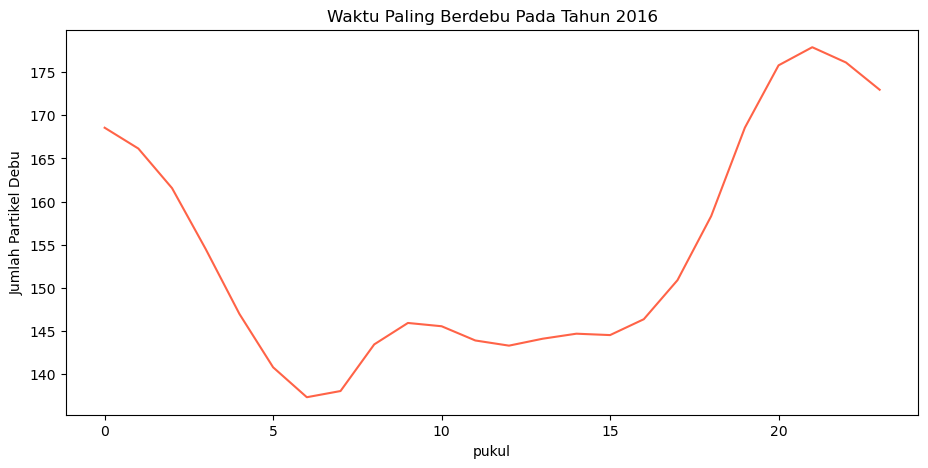

In [41]:
df_debu_all = df_debu.copy()
df_debu_all = df_debu_all.sort_values(by='pukul', ascending=True).reset_index()
df_debu_all = df_debu_all.groupby(df_debu_all['pukul'])['Dust'].mean()
df_debu_all = pd.DataFrame(df_debu_all)
df_debu_all['pukul'] = df_debu_all.index
fig = plt.figure(figsize =(11, 5))
my_palette = sns.color_palette(list_warna)
sns.set_palette(my_palette)
sns.lineplot(x='pukul', y='Dust', data=df_debu_all)
plt.xlabel('pukul')
plt.ylabel('Jumlah Partikel Debu')
plt.title(f'Waktu Paling Berdebu Pada Tahun 2016')
plt.show()

#### berdasarkan  rata-rata pada pukul tertentu di hari tertentu pada tahun 2016


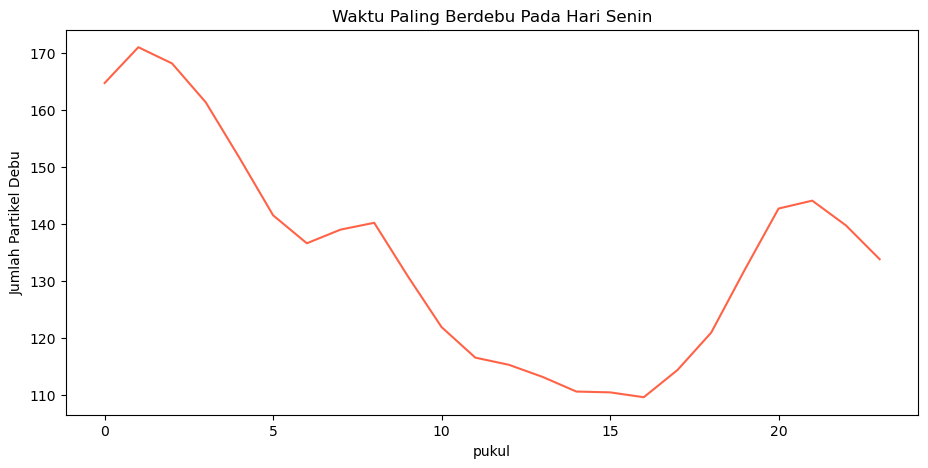

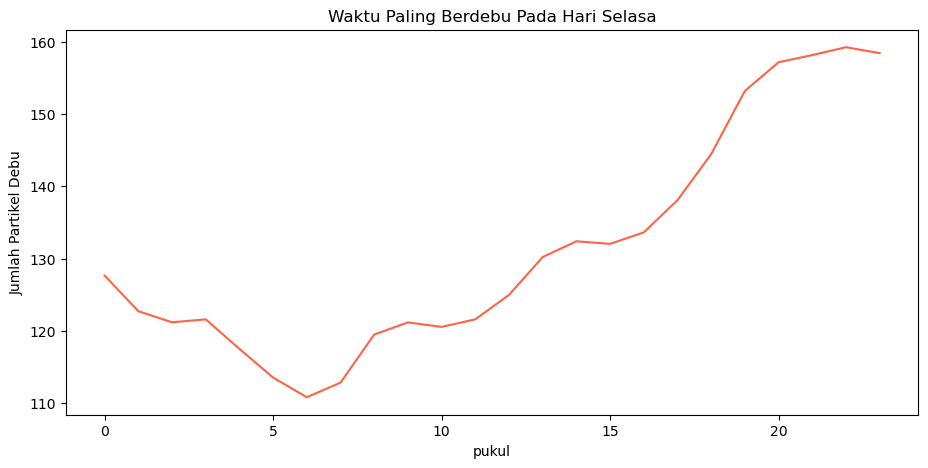

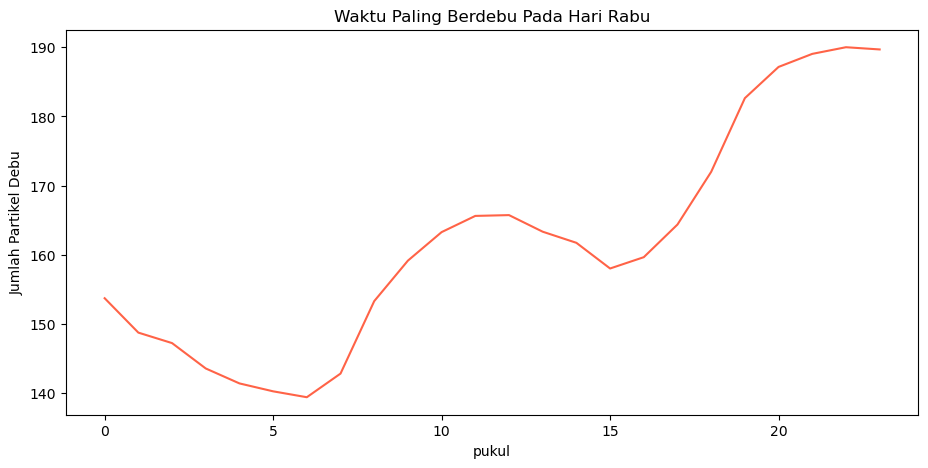

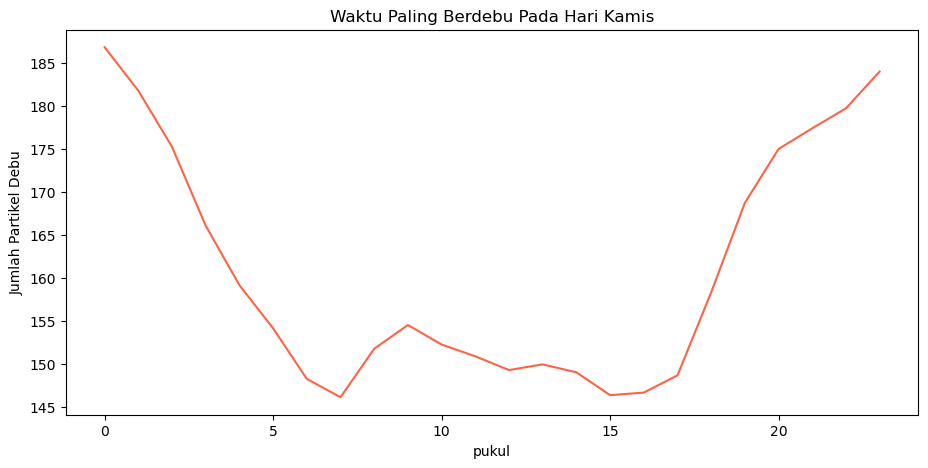

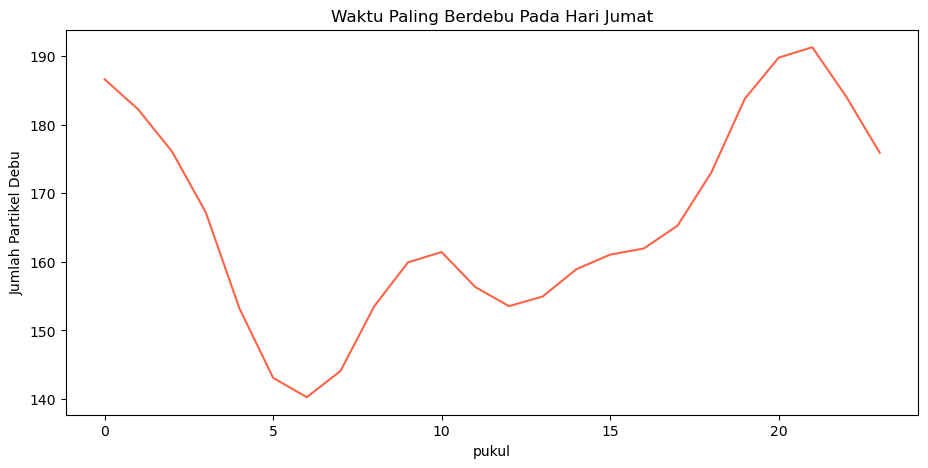

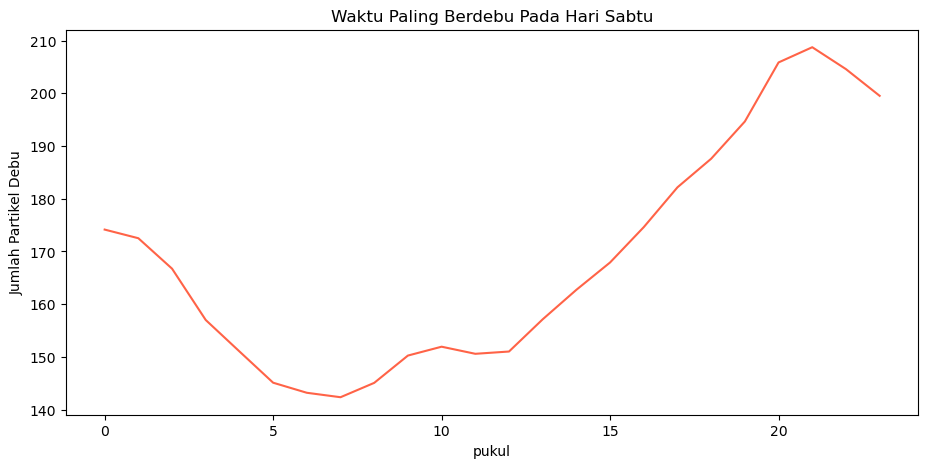

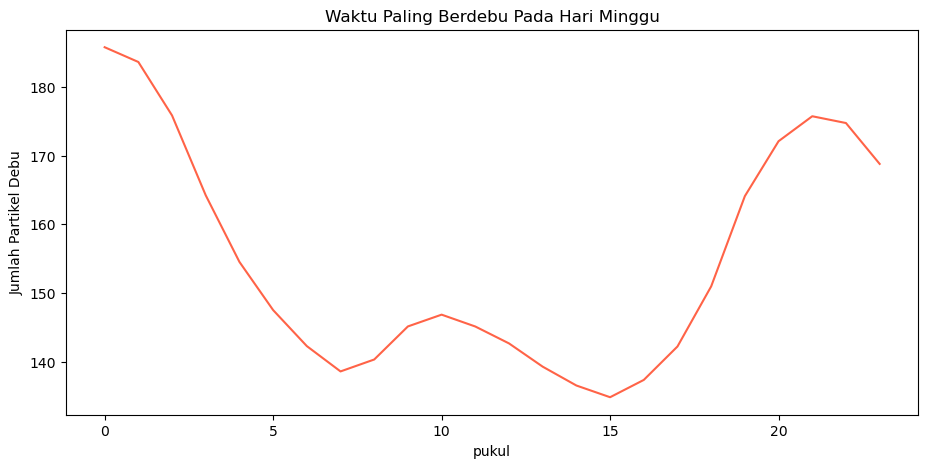

In [42]:
list_hari = ['Senin','Selasa','Rabu','Kamis','Jumat','Sabtu','Minggu']
for i in list_hari:
    df_debu_pukul = df_debu.loc[df_debu['hari'] == i].copy()
    df_debu_pukul = df_debu_pukul.sort_values(by='pukul', ascending=True).reset_index()
    df_debu_pukul = df_debu_pukul.groupby(df_debu_pukul['pukul'])['Dust'].mean()
    df_debu_pukul = pd.DataFrame(df_debu_pukul)
    df_debu_pukul['pukul'] = df_debu_pukul.index

    # membuat visualisasi
    fig = plt.figure(figsize =(11, 5))
    my_palette = sns.color_palette(list_warna)
    sns.set_palette(my_palette)
    sns.lineplot(x='pukul', y='Dust', data=df_debu_pukul)
    plt.xlabel('pukul')
    plt.ylabel('Jumlah Partikel Debu')
    plt.title(f'Waktu Paling Berdebu Pada Hari {i}')
    plt.show()
    print('')

Dari hasil analisis diatas, diketahui bahwa kenaikan partikel debu di 12 stasiun akan meningkat pada saat penduduk kota beijing beraktifitas, dan akan menurun ketika penduduk tidak beraktifitas.

## Conclusion

- Hasil visualisasi menunjukkan bahwa hari Sabtu adalah hari dengan tingkat keberdebu paling tinggi di Beijing sepanjang tahun 2016.
- Hasil visualisasi menunjukkan bahwa pukul 20.00 hingga 22.00 adalah waktu dengan tingkat keberdebu yang paling tinggi di Beijing sepanjang tahun 2016. Konsentrasi debu pada hari-hari tertentu bervariasi secara signifikan, tergantung pada aktivitas penduduk pada waktu-waktu tertentu. Sebagai contoh, pada hari Sabtu, terlihat kecenderungan konsentrasi yang lebih tinggi pada rentang waktu pukul 20.00 hingga 22.00 dibanding pada waktu 01.00-02.00, hal ini bertolak belakang dengan hari Senin, di mana konsentrasi debu lebih rendah pada pukul 20.00 hingga 22.00, tetapi lebih tinggi pada pukul 01.00 hingga 02.00.

#### menyimpan data frame untuk streamlit

In [ ]:
df_save = df_mean.copy()
df_save['debu total'] = df_save[['PM2.5','PM10']].sum(axis=1)
df_save.drop(labels=['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM','wd'], axis=1,inplace=True)
df_save = preprocess_dataframe(df_save)
# memeriksa df_save
df_save

In [ ]:
# save to csv
df_save.to_csv("all_data.csv", index=False)